In this notebook, we generate the figures that sumarize the results obtained during this project.

In [1]:
# tamaño de los numeros del corplot
# la leyenda de los biomes y los clusters

In [1]:
setwd("..")

In [2]:
# R packages
require(sp)
require(magrittr)
library(tidyr)
library(dplyr)
require(RColorBrewer)
library(ggplot2)
library(reshape)
library(patchwork)
library(psych)

# Burned area data
load("scripts/worldmap.Rdata", verbose = T)
load("data/ba_mon_clim_masked_df.Rdata", verbose = T)
load("data/biome_dataframe_masked.Rdata", verbose = T)
load("data/ba_mon_time_series_masked.Rdata", verbose = T)

# Clustering data
load("fireSeason_def_2.Rdata", verbose = T)

# No-delta correlation data
load('corrDfAnnualClusV2.Rdata', verbose = T)
load('corrDfAnnualClusLag1V2.Rdata', verbose = T)
load('corrDfAnnualClusLag2V2.Rdata', verbose = T)
load('corrDfAnnualClusLag3V2.Rdata', verbose = T)

# Delta correlation data
load('corrDfDeltaAnnualClusV2.Rdata', verbose = T)
load('corrDfDeltaAnnualClusLag1V2.Rdata', verbose = T)
load('corrDfDeltaAnnualClusLag2V2.Rdata', verbose = T)
load('corrDfDeltaAnnualClusLag3V2.Rdata', verbose = T)

# Models data
load('ModelData/models_results_per_cluster_with_delta_no_persistence_v2.Rdata', verbose = T)
load('ModelData/models_results_per_cluster_with_delta_lag1_v2.Rdata', verbose = T)
load('ModelData/models_results_per_cluster_with_delta_lag2_v2.Rdata', verbose = T)
load('ModelData/models_results_per_cluster_with_delta_lag3_v2.Rdata', verbose = T)
load('ModelData/models_results_per_cluster_with_delta_lag123_v2.Rdata', verbose = T)
load('ModelData/models_results_per_cluster_with_delta_lag0123_v2.Rdata', verbose = T)

Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.6.3"Loading required package: magrittr
Warning message:
"package 'magrittr' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"
Attaching package: 'tidyr'

The following object is masked from 'package:magrittr':

    extract

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: RColorBrewer
Warning message:
"package 'reshape' was built under R version 3.6.3"
Attaching package: 'reshape'

The following object is masked from 'package:dplyr':

    rename

The following objects are masked from 'package:tidyr':

    expand, smiths

Warning message:
"package 'patchwork' was built under R version 3.6.3"Warning message:
"package

Loading objects:
  coast.lines
Loading objects:
  df_masked
  masked_coords
Loading objects:
  legend.biomes
  biomes
Loading objects:
  masked_coords
  dates
  masked_ba_series
Loading objects:
  fireSeason_def_2
Loading objects:
  corr.df
Loading objects:
  corr.df.lag.1
Loading objects:
  corr.df.lag.2
Loading objects:
  corr.df.lag.3
Loading objects:
  corr.df.delta
Loading objects:
  corr.df.delta.1
Loading objects:
  corr.df.delta.2
Loading objects:
  corr.df.delta.3
Loading objects:
  table
Loading objects:
  table.deltas.Lag.1
Loading objects:
  table.deltas.Lag.2
Loading objects:
  table.deltas.Lag.3
Loading objects:
  table.deltas.Lag.123
Loading objects:
  table.deltas.Lag.0123


In [3]:
# CPCs indexes
nina34 = read.table("CPC/nina34.anom.data.txt", skip = 3, nrows = 72)
colnames(nina34) = c("Year", month.abb)
nina34[,-1] = (nina34[,-1] - mean(as.matrix(nina34[32:61,-1]))) / sd(as.matrix(nina34[32:61,-1]))

nao = read.table("CPC/nao_index.tim.txt", skip = 8, header = T)
nao <- nao %>% spread(MONTH,INDEX)
colnames(nao) = c("Year", month.abb)

oni = read.table("CPC/oni.data", skip = 1, nrows = 72, 
                    col.names = c("Year", month.abb))
oni[,-1] = (oni[,-1] - mean(as.matrix(oni[32:61,-1]))) / sd(as.matrix(oni[32:61,-1]))

poleur = read.table("CPC/poleur_index.tim", skip = 8, header = T)
poleur <- poleur %>% spread(MONTH,INDEX)
colnames(poleur) = c("Year", month.abb)

ea = read.table("CPC/ea_index.tim.txt", skip = 8, header = T)
ea <- ea %>% spread(MONTH,INDEX)
colnames(ea) = c("Year", month.abb)

eawr = read.table("CPC/eawr_index.tim.txt", skip = 8, header = T)
eawr <- eawr %>% spread(MONTH,INDEX)
colnames(eawr) = c("Year", month.abb)

pna = read.table("CPC/pna_index.tim.txt", skip = 8, header = T)
pna <- pna %>% spread(MONTH,INDEX)
colnames(pna) = c("Year", month.abb)

scand = read.table("CPC/scand_index.tim.txt", skip = 8, header = T)
scand <- scand %>% spread(MONTH,INDEX)
colnames(scand) = c("Year", month.abb)

wp = read.table("CPC/wp_index.tim.txt", skip = 8, header = T)
wp <- wp %>% spread(MONTH,INDEX)
colnames(wp) = c("Year", month.abb)

soi = read.table("CPC/soi.txt", skip = 88, ,nrows = 70,
                 col.names = c("Year", month.abb))

## Figure 1

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

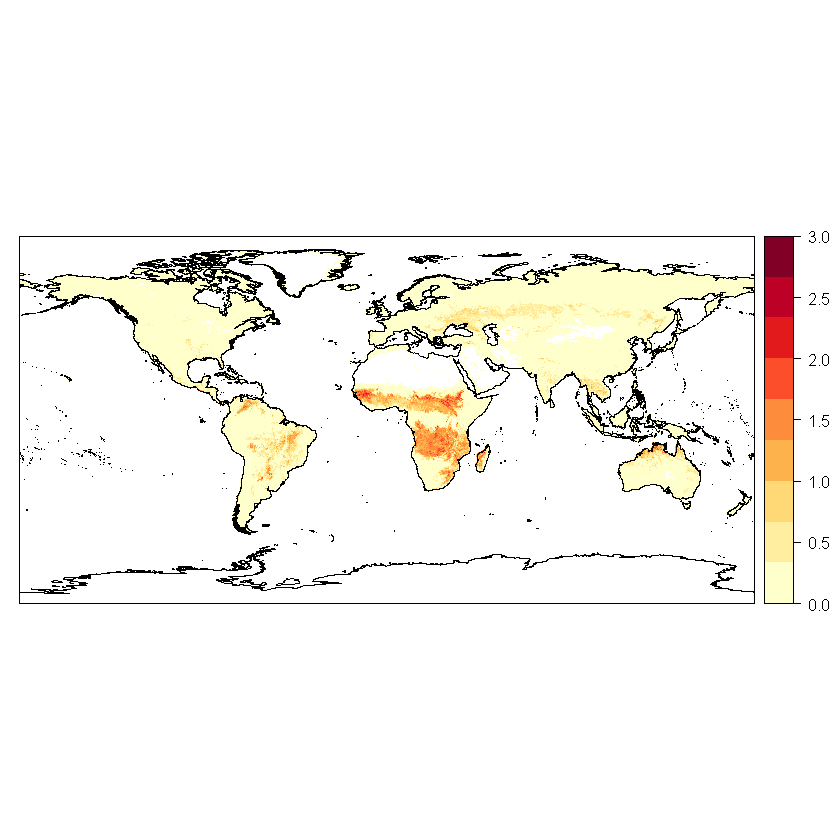

In [12]:
# Plot of the fire climatology (Figure1a)

#pdf(file="Figures/Figure1a.pdf")

arg.list <- list(col.regions = brewer.pal(9, 'YlOrRd'), at = seq(0, 3, 1/3))
                 #main = paste("Log10 fire climatology"))

df1 <- cbind.data.frame(masked_coords, apply(log10(masked_ba_series + 1), 2, mean))
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

#dev.off()

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

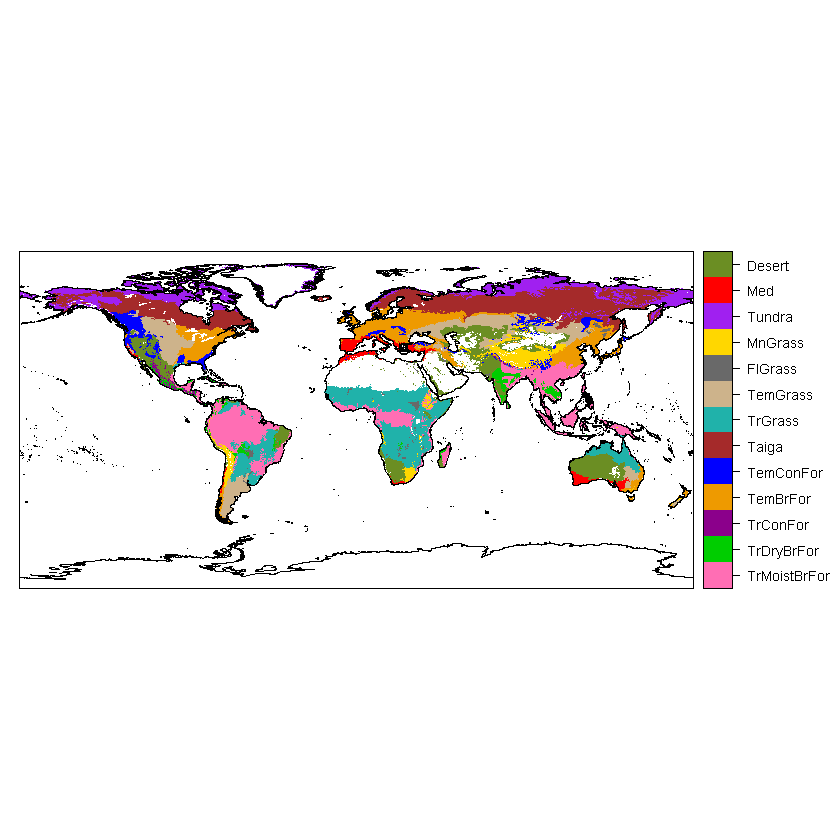

In [33]:
# Plot of the biomes (Figure1b)

#pdf(file="Figures/Figure1b.pdf")

arg.list <- list(col.regions = c('hotpink1', 'green3', 'darkmagenta', 'orange2', 'blue', 'brown', 'lightseagreen', 'navajowhite3',
                                 'grey41', 'gold1', 'purple', 'red', 'olivedrab'),
                 at = seq(0, 13, 1),
                 colorkey = list(labels = list(labels = legend.biomes$Label[1:13], 
                                               at = seq(.5,12.5,1), cex = .7)))
                 
v <- as.numeric(fireSeason_def_2$BIOME)
v[which(v > 13)] <- NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

#dev.off()

## Figure 2

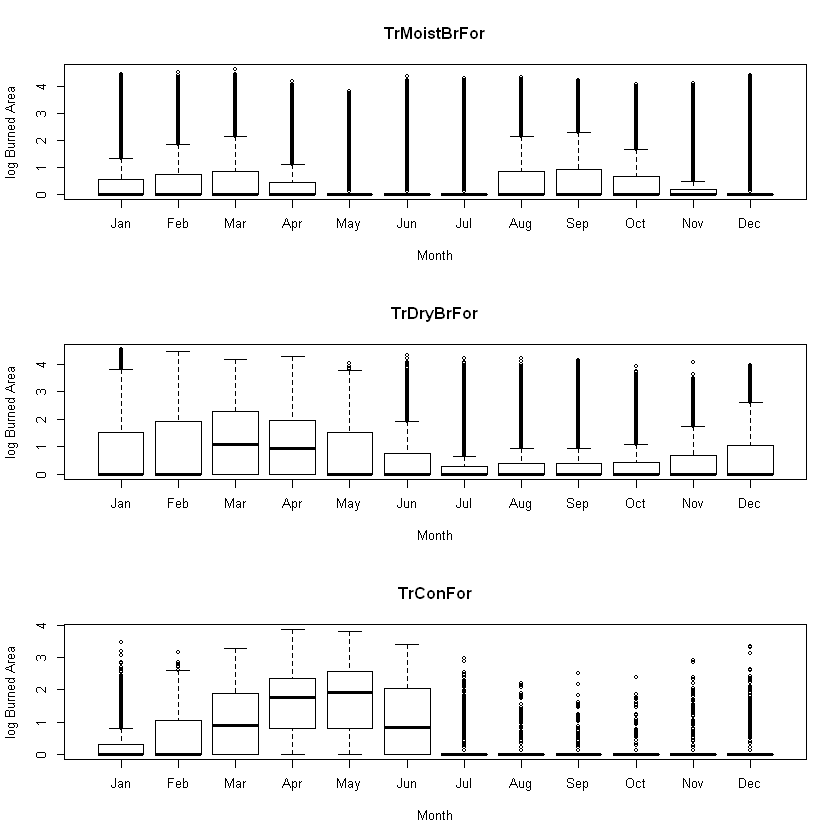

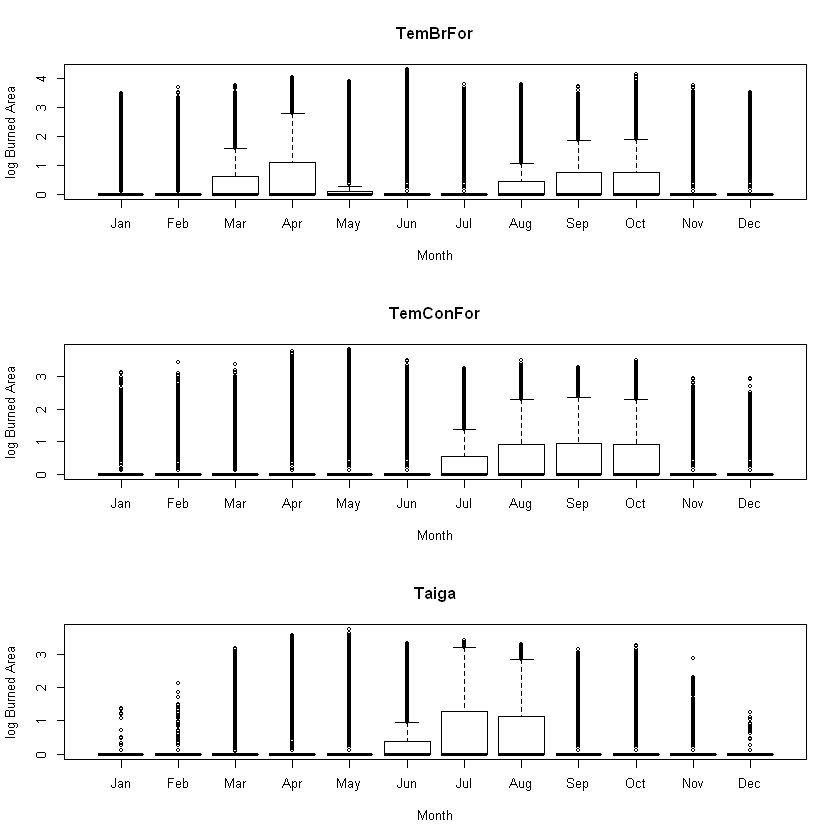

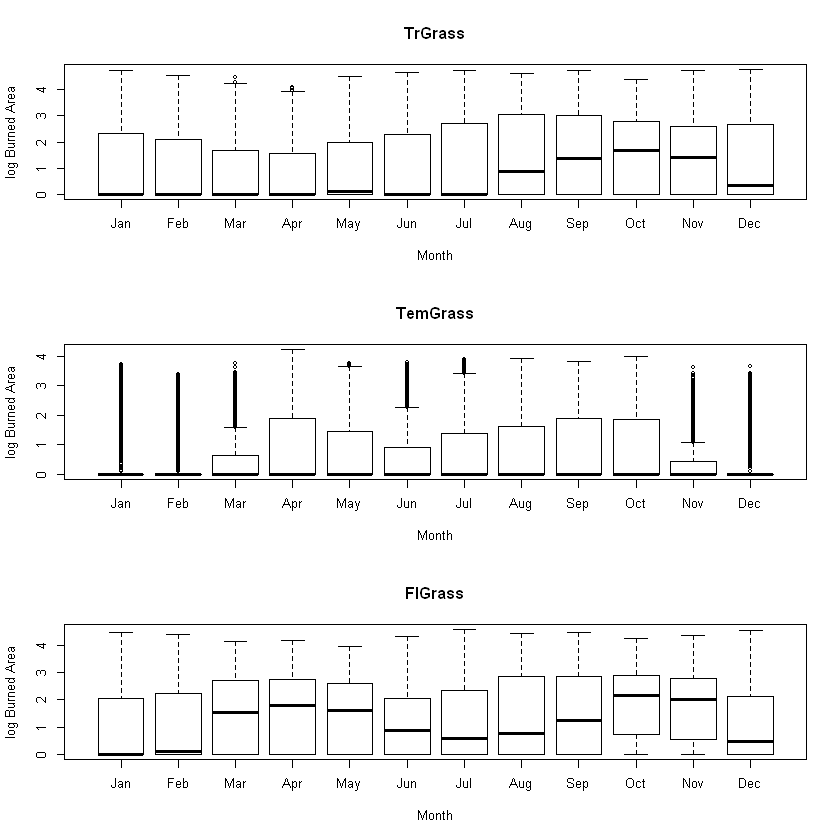

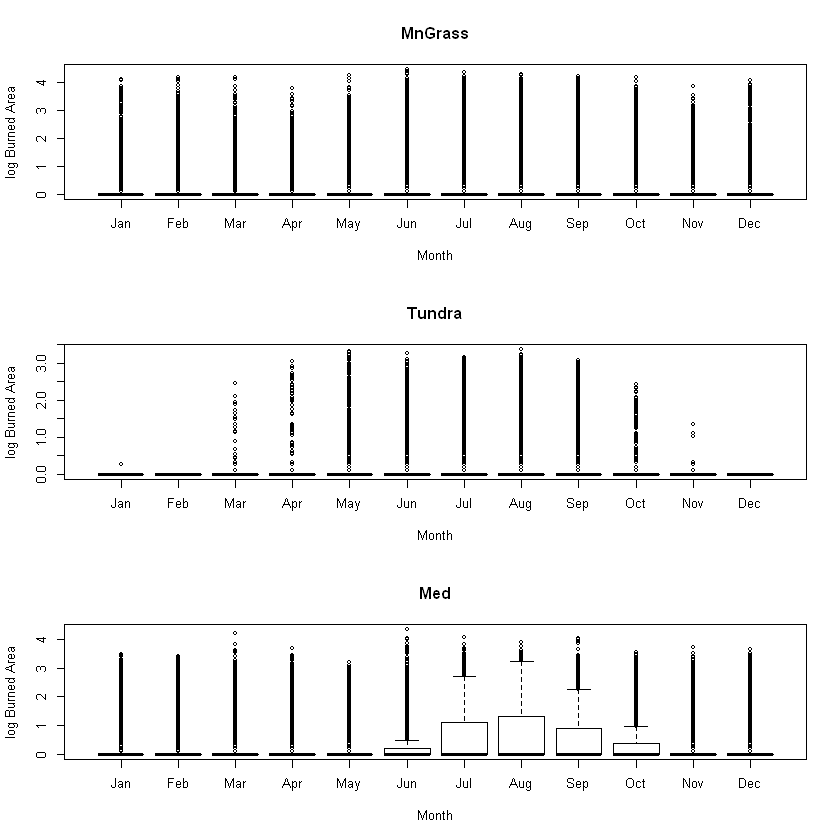

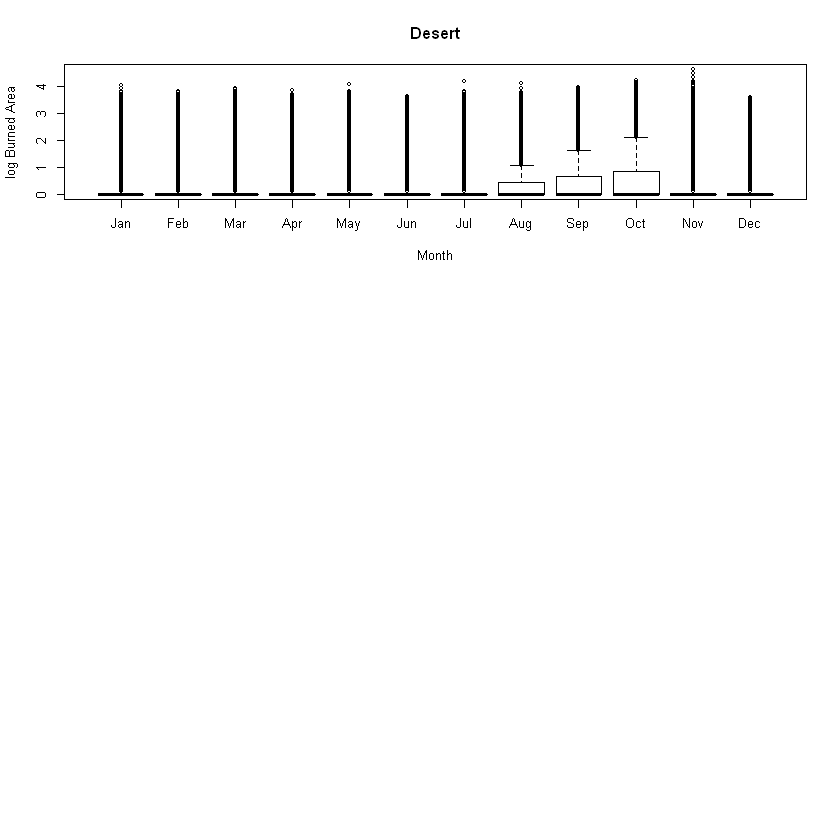

In [20]:
# Boxplots of the burned area distribution per month and biome

df.log10 = log10(df_masked + 1)
names(df.log10) = c('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
#jpeg(file="Figures/Figure2_part1.jpeg")

par(mfrow = c(3,1))
for (i in 1:3){
    ind.biome = which(biomes$BIOME == i)
    boxplot(df.log10[ind.biome,], main = legend.biomes$Label[i], xlab = 'Month', ylab = 'log Burned Area')
}

#dev.off()

#jpeg(file="Figures/Figure2_part2.jpeg")

par(mfrow = c(3,1))
for (i in 4:6){
    ind.biome = which(biomes$BIOME == i)
    boxplot(df.log10[ind.biome,], main = legend.biomes$Label[i], xlab = 'Month', ylab = 'log Burned Area')
}

#dev.off()

#jpeg(file="Figures/Figure2_part3.jpeg")

par(mfrow = c(3,1))
for (i in 7:9){
    ind.biome = which(biomes$BIOME == i)
    boxplot(df.log10[ind.biome,], main = legend.biomes$Label[i], xlab = 'Month', ylab = 'log Burned Area')
}

#dev.off()

#jpeg(file="Figures/Figure2_part4.jpeg")

par(mfrow = c(3,1))
for (i in 10:12){
    ind.biome = which(biomes$BIOME == i)
    boxplot(df.log10[ind.biome,], main = legend.biomes$Label[i], xlab = 'Month', ylab = 'log Burned Area')
}

#dev.off()

#jpeg(file="Figures/Figure2_part5.jpeg")

par(mfrow = c(3,1))
for (i in 13){
    ind.biome = which(biomes$BIOME == i)
    boxplot(df.log10[ind.biome,], main = legend.biomes$Label[i], xlab = 'Month', ylab = 'log Burned Area')
}

#dev.off()

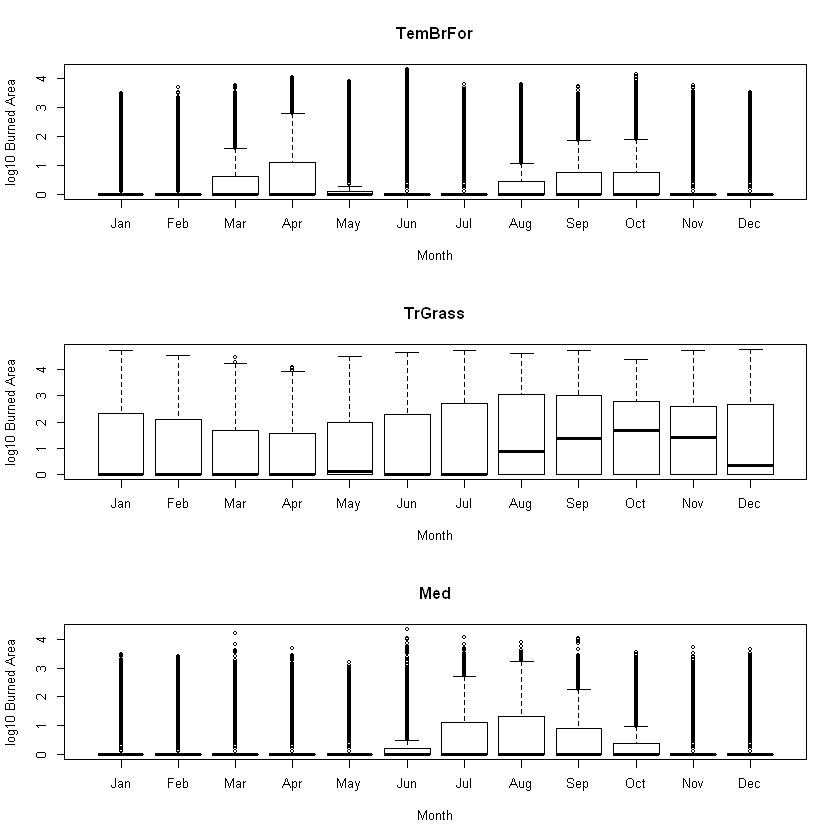

In [31]:
# Boxplots of the interesting biomes

df.log10 = log10(df_masked + 1)
names(df.log10) = month.abb
#pdf(file="Figures/Figure2_boxplots.pdf")

par(mfrow = c(3,1))
for (i in c(4,7,12)){
    ind.biome = which(biomes$BIOME == i)
    boxplot(df.log10[ind.biome,], main = legend.biomes$Label[i], xlab = 'Month', ylab = 'log10 Burned Area')
}

#dev.off()

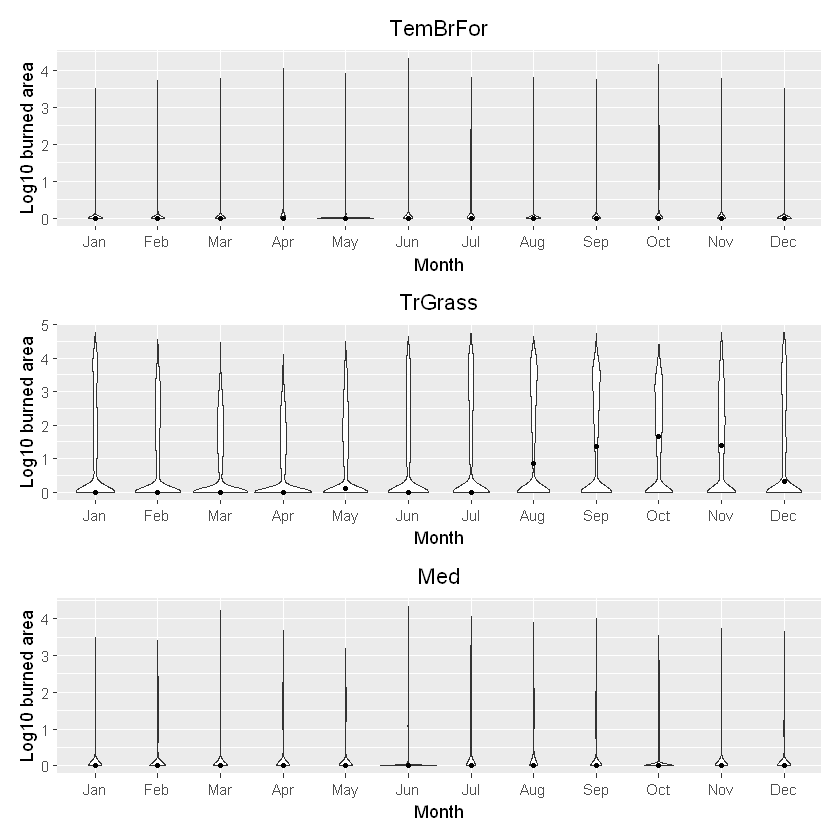

In [72]:
# Violin plots of the interesting biomes

df.log10 = log10(df_masked + 1)
names(df.log10) = c('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

#pdf(file="Figures/Figure2_violins.pdf")
p = list()
for (i in c(4,7,12)){
    ind.biome = which(biomes$BIOME == i)
    m1 <- melt(df.log10[ind.biome,], id = c())
    p[[i]] <-ggplot(m1, aes(x=variable, y=value)) + geom_violin() + stat_summary(fun=median, geom="point", size = 1) + xlab('Month') + ylab('Log10 burned area') + ggtitle(legend.biomes$Label[i]) + theme(plot.title = element_text(hjust = 0.5))
}

p[[4]] / p[[7]] / p[[12]]
#dev.off()

## Figure 3

In [36]:
# Spatial distribution of clusters

fireSeason_def_2$bi.cl = paste(as.integer(fireSeason_def_2$BIOME),fireSeason_def_2$cl, sep = ',')
fireSeason_def_2$bi.cl = as.factor(fireSeason_def_2$bi.cl)
# Sort the levels of the factor
fireSeason_def_2$bi.cl = factor(fireSeason_def_2$bi.cl, levels = c('1,1', '1,2', '1,3', '1,4', '1,5', '1,6', '2,1', '2,2',
                                                                   '2,3', '2,4', '2,5', '2,6', '3,1', '3,2', '4,1', '4,2',
                                                                   '4,3', '4,4', '4,5', '5,1', '5,2', '5,3', '6,1', '6,2',
                                                                   '6,3', '7,1', '7,2', '7,3', '7,4', '7,5', '7,6', '8,1',
                                                                   '8,2', '8,3', '8,4', '9,1', '9,2', '9,3', '9,4', '9,5',
                                                                   '9,6', '9,7', '10,1', '10,2','10,3', '11,1', '11,2', '12,1',
                                                                   '12,2', '12,3', '12,4', '13,1', '13,2', '13,3', '13,4',
                                                                   '14,NA', '15,NA', '16,NA', 'NA,NA'))


colors.def = vector(mode = "character", length = length(levels(fireSeason_def_2$bi.cl)))

colors <- col2rgb(c('hotpink1', 'green3', 'darkmagenta', 'orange2', 'blue', 'brown', 'lightseagreen', 'navajowhite3',
                                 'grey41', 'gold1', 'purple', 'red', 'olivedrab'))
# Make the new palette
i = 0
for (biome in 1:13){
    clusters = sort(unique(fireSeason_def_2[which(fireSeason_def_2$BIOME == biome),]$cl))

    for (cl in 1:length(clusters)){
        i = i + 1
        colors.def[i] = rgb(colors[1,biome], colors[2,biome], colors[3,biome],
                            alpha = (length(clusters) + 1 - cl) * 255 / length(clusters), maxColorValue = 255)
    }
}

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

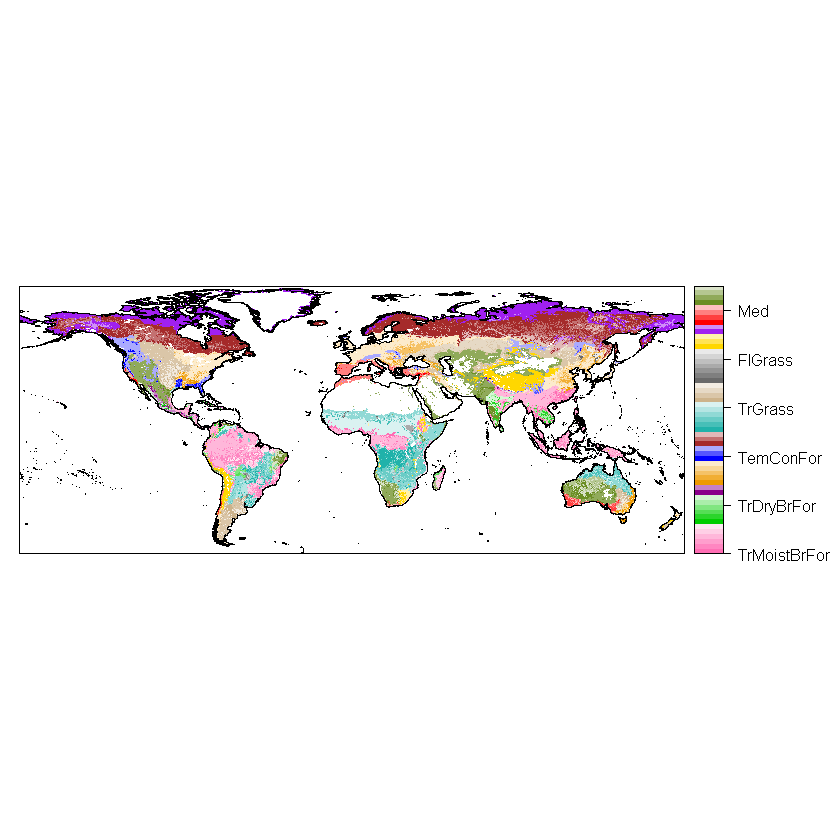

In [38]:
#pdf(file="Figures/Figure3.pdf")

arg.list <- list(col.regions = colors.def[1:55],
                 at = seq(0,55,1),
                 colorkey = list(labels = list(labels = legend.biomes$Label[c(1,2,5,7,9,12)])))                 

v <- rep(NA, nrow(df_masked))
for (biome in 1:13){
    v[which(fireSeason_def_2$BIOME == biome)] <- fireSeason_def_2$bi.cl[which(fireSeason_def_2$BIOME == biome)]
}

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <-  c(-60,85)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

#dev.off()

## Figure 4

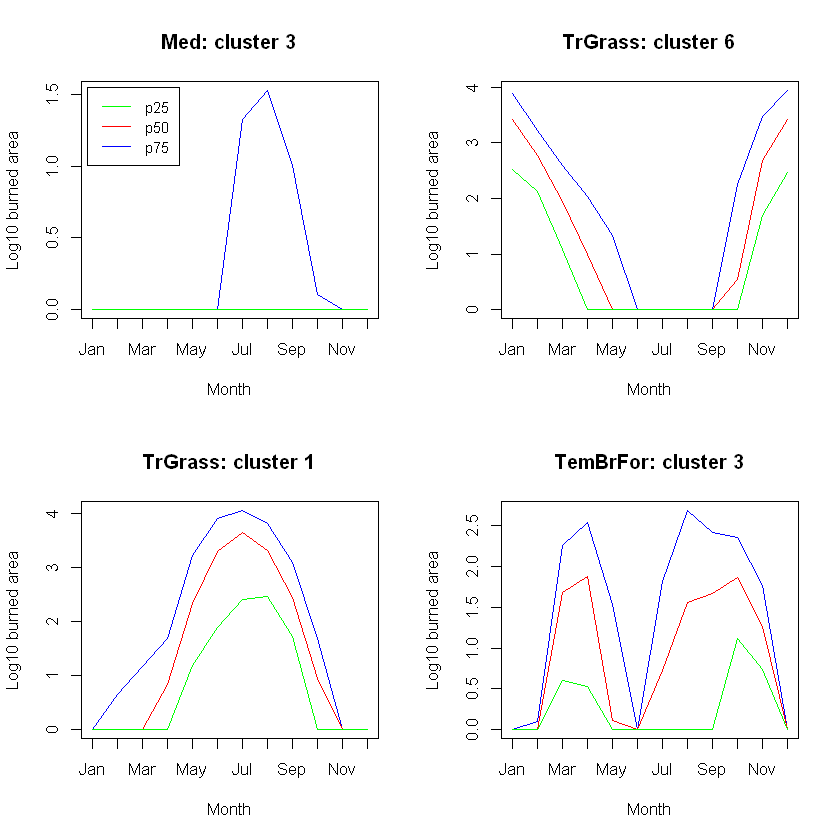

In [43]:
# Fire seasons

#pdf(file="Figures/Figure4.pdf")

#' @title Quantiles plot
#' @description Plots the clusters' quantiles
#' @param fireSeasons Data frame containing coordinates, biome, cluster, start and end months of the fire season, start and end
#  months of the secondary fire season if exists and form of the fire season for each pixel
#' @param df Data frame containing the burned area data
#' @param biome Number of the biome
#' @param cluster Number of the cluster
#' @param legend.biomes Data frame containing the labels of each biome
#' @param title Title of the plot
plot.quantiles <- function(fireSeasons, df, biome, cluster, legend.biomes, title = '') {
      
    ind.coords = which(fireSeasons$BIOME == biome & fireSeasons$cl == cluster)

    med = apply(df[ind.coords,], 2, median, na.rm = T)
    p25 = apply(df[ind.coords,], 2, quantile, prob = 0.25, na.rm = T)
    p75 = apply(df[ind.coords,], 2, quantile, prob = 0.75, na.rm = T)
    
    if (title == ''){
        title = paste(legend.biomes$Label[biome], ': cluster ', toString(cluster), sep = '')# meter leyenda en un panel
    }
    
    plot(p75, col = 'blue', type = 'l', xaxt = 'n', xlab = "Month", ylab = "Log10 burned area", main = title)
    axis(1, at=1:12, labels = month.abb)
    lines(1:12, med, col = "red")
    lines(1:12, p25, col = "green") 
}


par(mfrow = c(2,2))

plot.quantiles(fireSeason_def_2, log10(df_masked + 1), 12, 3, legend.biomes)

legend(.8, 1.55, legend=c("p25", "p50", "p75"),
       col=c("green", "red", "blue"), lty=1, cex = .9)

plot.quantiles(fireSeason_def_2, log10(df_masked + 1), 7, 6, legend.biomes)
plot.quantiles(fireSeason_def_2, log10(df_masked + 1), 7, 1, legend.biomes)
plot.quantiles(fireSeason_def_2, log10(df_masked + 1), 4, 3, legend.biomes)
#dev.off()

## Figure 5

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

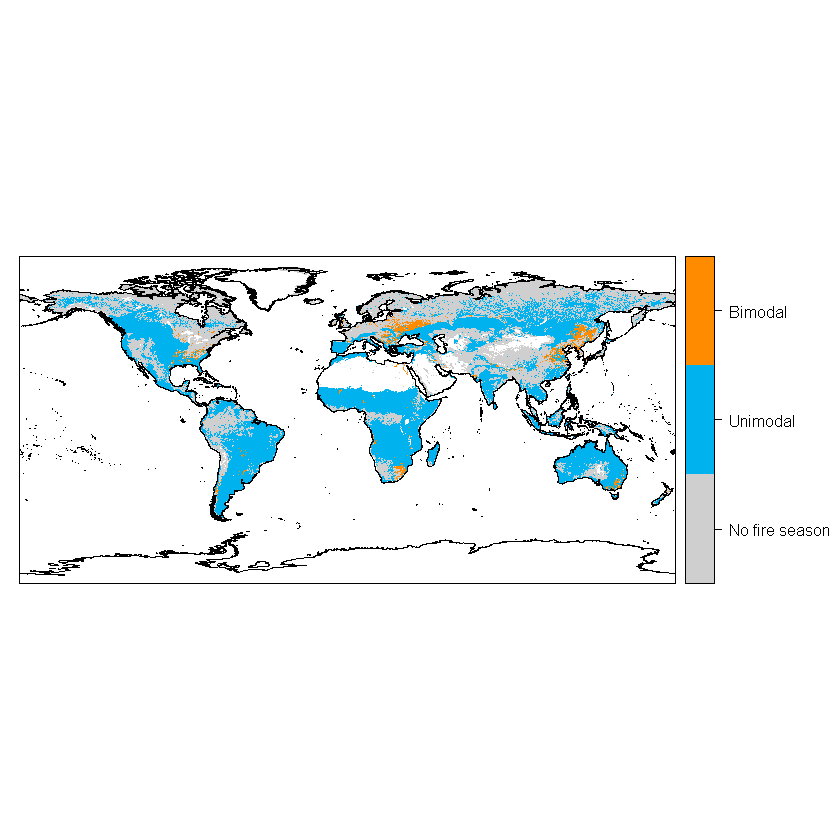

In [37]:
# Fire season shape

#pdf(file="Figures/Figure5.pdf")

arg.list <- list(col.regions = c('grey81', 'deepskyblue2', 'darkorange'),
                 at = seq(-1, 2, 1),# main = "Fire season shape",
                 colorkey = list(labels = list(labels = c("No fire season", "Unimodal", "Bimodal"),
                                               at = c(-.5,.5,1.5))))
v <- fireSeason_def_2$form
v[which(fireSeason_def_2$form == 3)] <- NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

#dev.off()

## Figure 6

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

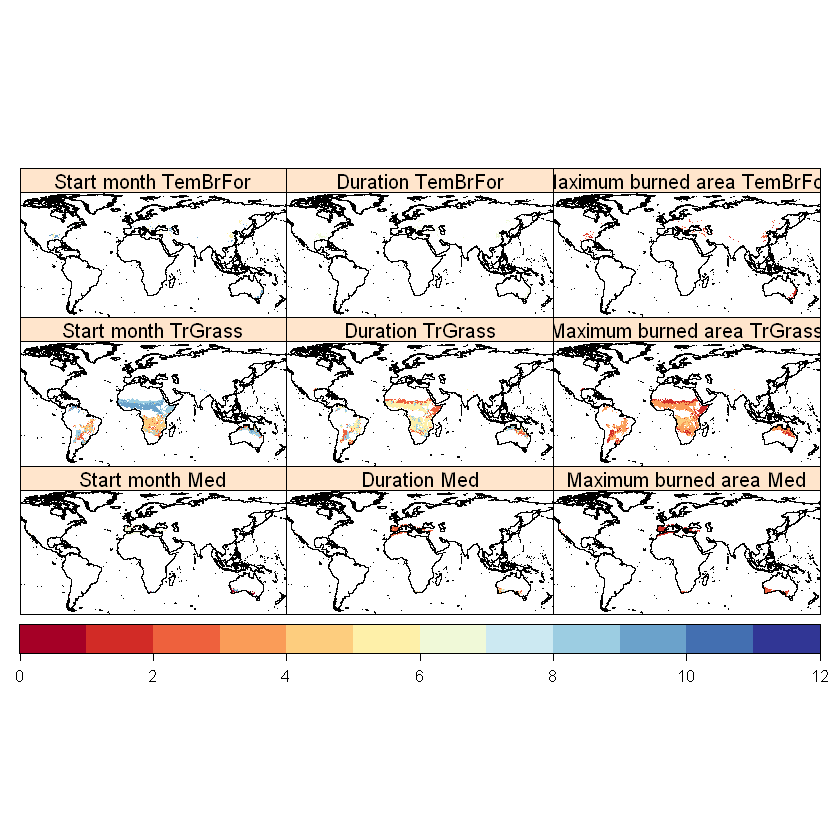

In [45]:
# Fire seasons (unimodal clusters)

#' @title Fire season start month, duration and maximum burned area plots
#' @description Plots one map containing the start month of the fire season of each pixel, another one containing the duration 
#  of the fire seasons (in number of months) and the last map represents the burned area of the month of the fire season which 
#  has the highest burned area of the year in that cluster. You can choose which biomes do you want to plot or plot all of them
#' @param coords Data frame with the spatial coordinates of the points
#' @param fireSeasons Data frame containing coordinates, biome, cluster, start and end months of the fire season, start and end months of the secondary fire season if exists and form of the fire season for each pixel
#' @param Data frame containing the burned area data of each pixel
#' @param biomes Vector containing the number of the biomes you want to plot
#' @param Shape Number indicating the type of fire season you want to plot. You can choose between 1 (unimodal fire season), 2
#  (bimodal main fire season) or 3 (bimadal secondary fire season)
#' @param mode Number indicating if you want to plot all biomes in one plot per class (start month, duration and maximum burned 
#  area) or do you prefer to have the data of each biome in one separate map per class. Default to 1 (one map per biome). The
#  other possible number is 2 (all biomes in one plot)
#' @param title Title of the plot
plot.fire.seasons <- function (coords, fireSeasons, df, biomes, Shape, mode = 1, layout = c(3,3)){
    # Initialize the variables
    df1 = coords
    start.month <- numeric(nrow(df))
    duration <- numeric(nrow(df))
    max.ba <- rep(NA, nrow(df))
    shape <- Shape
    
    if (Shape == 3){# For bimodal secondary fire seasons
        fireSeasons$start.1 <- fireSeasons$start.2
        fireSeasons$end.1 <- fireSeasons$end.2
        shape = 2
    }
    
    if (mode == 2){# All the biomes are considered
        biomes = 1:13
    }
    
    names.attr = c()
    j = 0
    for (biome in biomes){
        if (mode == 1){# If mode==1, these variables should be initialized in each iteration
            start.month <- numeric(nrow(df))
            duration <- numeric(nrow(df))
            max.ba <- rep(NA, nrow(df))
        }
        
        # Obtaining the fire seasons start month
        start.month[-which(fireSeasons$form == shape)] <- NA
        start.month[which(fireSeasons$form == shape)] <- fireSeasons$start.1[which(fireSeasons$form == shape)]
        
        # Obtaining the fire seasons duration
        duration[-which(fireSeasons$form == shape)] <- NA
        duration[which(fireSeasons$form == shape)] <- fireSeasons$end.1[which(fireSeasons$form == shape)] - fireSeasons$start.1[which(fireSeasons$form == shape)]
        duration[which(fireSeasons$form == shape)][which(duration[which(fireSeasons$form == shape)]<0)] = 12 - abs(duration[which(fireSeasons$form == shape)][which(duration[which(fireSeasons$form == shape)]<0)])
        duration[which(fireSeasons$form == shape)] = duration[which(fireSeasons$form == shape)] + 1
        

        # Obtaining the month of the fire season which has the highest burned area
        clusters = sort(unique(fireSeasons[which(fireSeasons$form == shape
                                                 & fireSeasons$BIOME == biome),]$cl))
        n.clusters = length(clusters)
        
        if (n.clusters == 0){# If there are no clusters having this shape in the biome
            next
        }
            
        for (cl in 1:n.clusters){
            clus = clusters[cl]  
            ind.coords = which(fireSeasons$form == shape & fireSeasons$BIOME == biome & fireSeasons$cl == clus)

            p75 = apply(df[ind.coords,], 2, quantile, prob = 0.75, na.rm = T)
            if (Shape == 1){
                max.ba[ind.coords] = max(p75, na.rm = T)
            } else {# bimodal fire seasons
                # Obtaining the months of the fire season
                if (fireSeasons[ind.coords[1],]$end.1 >= fireSeasons[ind.coords[1],]$start.1){
                    months = seq(fireSeasons[ind.coords[1],]$start.1, fireSeasons[ind.coords[1],]$end.1, 1)
                } else {
                    months = c(seq(1, fireSeasons[ind.coords[1],]$end.1, 1), seq(fireSeasons[ind.coords[1],]$start.1, 12, 1))
                }
                max.ba[ind.coords] = max(p75[months], na.rm = T)
            }
        }

        if (mode == 1){# Store the value of each variable in one new column of the data frame
            start.month[-which(fireSeasons$BIOME == biome)] <- NA
            duration[-which(fireSeasons$BIOME == biome)] <- NA
            df1 <- cbind.data.frame(df1, start.month, duration, max.ba)
            
            # Update names.attr
            names.attr[3*j + 1] <- paste('Start month', legend.biomes$Label[biome])
            names.attr[3*j + 2] <- paste('Duration', legend.biomes$Label[biome])
            names.attr[3*j + 3] <- paste('Maximum burned area', legend.biomes$Label[biome])
        }
        
        j = j + 1
           
    }
    if (mode == 2){# Store the value of each variable in one new column of the data frame
        df1 <- cbind.data.frame(df1, start.month, duration, max.ba)
        names.attr[1] = 'Start month'
        names.attr[2] = 'Duration'
        names.attr[3] = 'Maximum burned area'
    }
    
    # Plot the data
    arg.list <- list(col.regions = colorRampPalette(brewer.pal(11, "RdYlBu"))(12), at = seq(0, 12, 1),
                         colorkey = list(space = 'bottom'), layout = layout, as.table = T)# labels = month.abb

    coordinates(df1) <- c(1,2)
    gridded(df1) <- TRUE
    arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
    arg.list[["obj"]] <- df1
    arg.list[['names.attr']] <- names.attr
    arg.list[["ylim"]] <-  c(-60,85)
    arg.list[["xlim"]] <- c(-130,180)
    do.call("spplot", arg.list) %>% print()
}

#pdf(file="Figures/Figure6.pdf", height = 10, width = 14)
plot.fire.seasons(masked_coords, fireSeason_def_2, log10(df_masked + 1), c(4,7,12), 1)
#dev.off()

## Figure 7

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

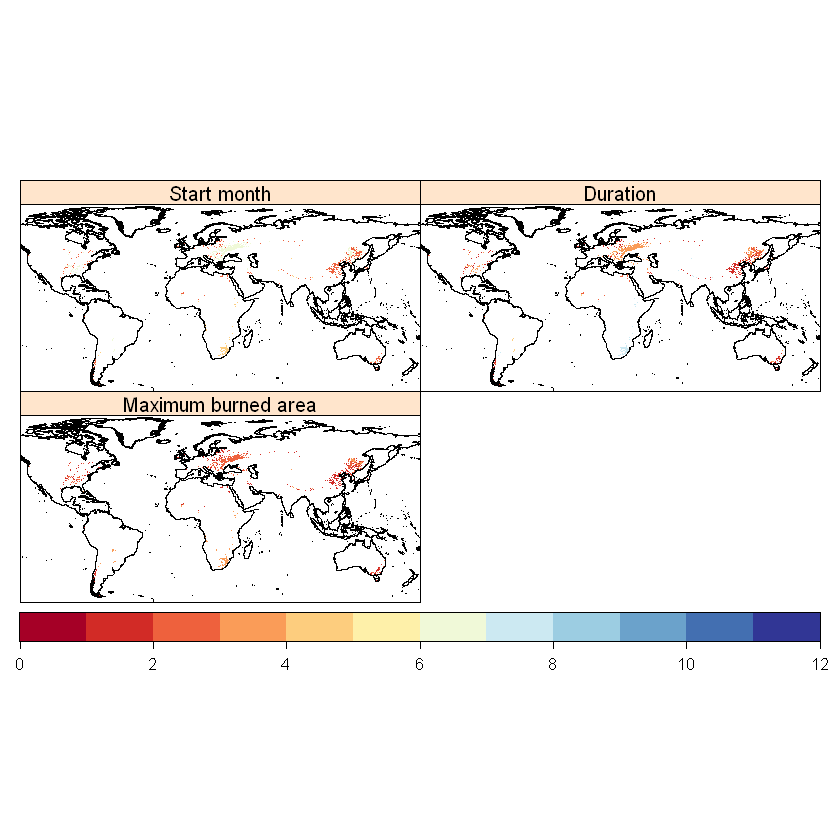

In [13]:
# Fire seasons (bimodal clusters, main fire seasons)

#pdf(file="Figures/Figure7.pdf", height = 10, width = 12)
plot.fire.seasons(masked_coords, fireSeason_def_2, log10(df_masked + 1), 4, 2, layout = c(2,2), mode = 2)
#dev.off()

## Figure 8

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

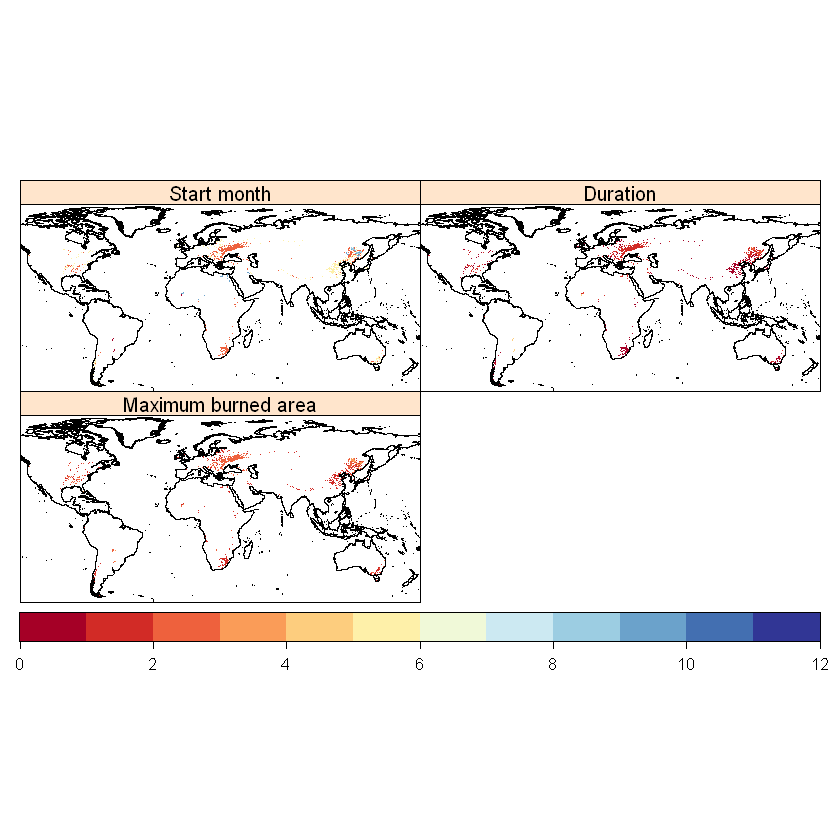

In [15]:
# Fire seasons (bimodal clusters, secondary fire seasons)

#pdf(file="Figures/Figure8.pdf", height = 10, width = 12)
plot.fire.seasons(masked_coords, fireSeason_def_2, log10(df_masked + 1), 1, 3, layout = c(2,2), mode = 2)
#dev.off()

## Figure 9

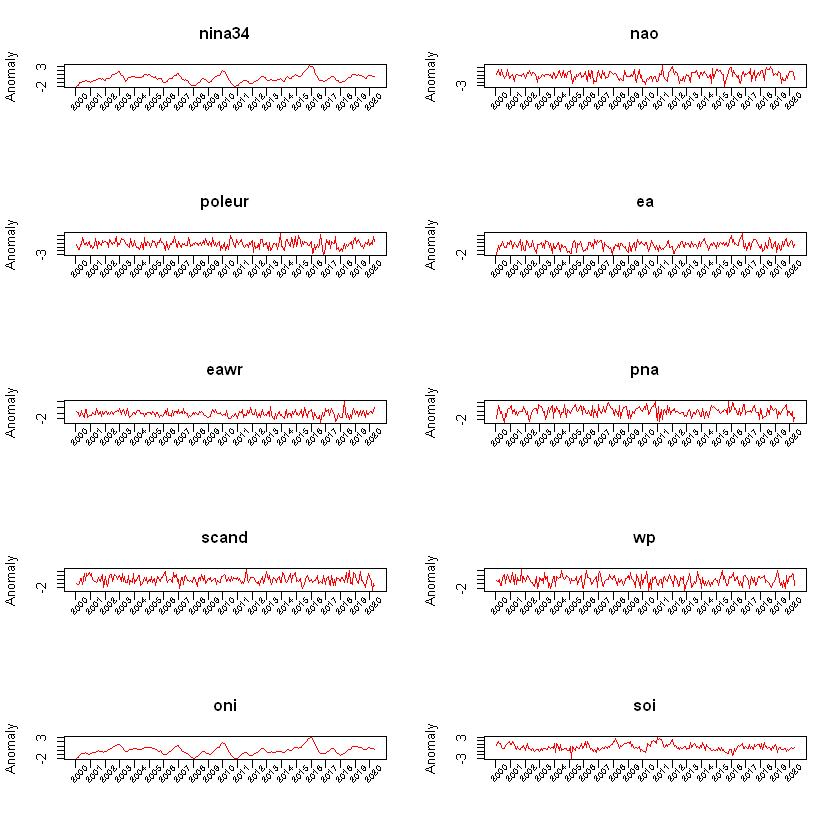

In [56]:
# Cpcs time series

list.cpcs = list(nina34, nao, poleur, ea, eawr, pna, scand, wp, oni, soi)
names = c('nina34', 'nao', 'poleur', 'ea', 'eawr', 'pna', 'scand', 'wp', 'oni', 'soi')

#pdf(file="Figures/Figure9.pdf", height = 10)
par(mfrow = c(5,2))
for (i in 1:10){
    plot(as.vector(t(as.matrix(list.cpcs[[i]][which(list.cpcs[[i]]$Year %in% 2000:2020),-1])))[1:244], type = 'l', xaxt = "n", 
         xlab = '', ylab = 'Anomaly', main = names[i], col = 'red')
    axis(1, at=seq(0,244,12), labels = F)
    text(seq(0,244,12), par("usr")[3] - .8, labels=2000:2020, srt = 45, pos = 1, xpd = TRUE, cex = .7)
}
#dev.off()

## Figure 10

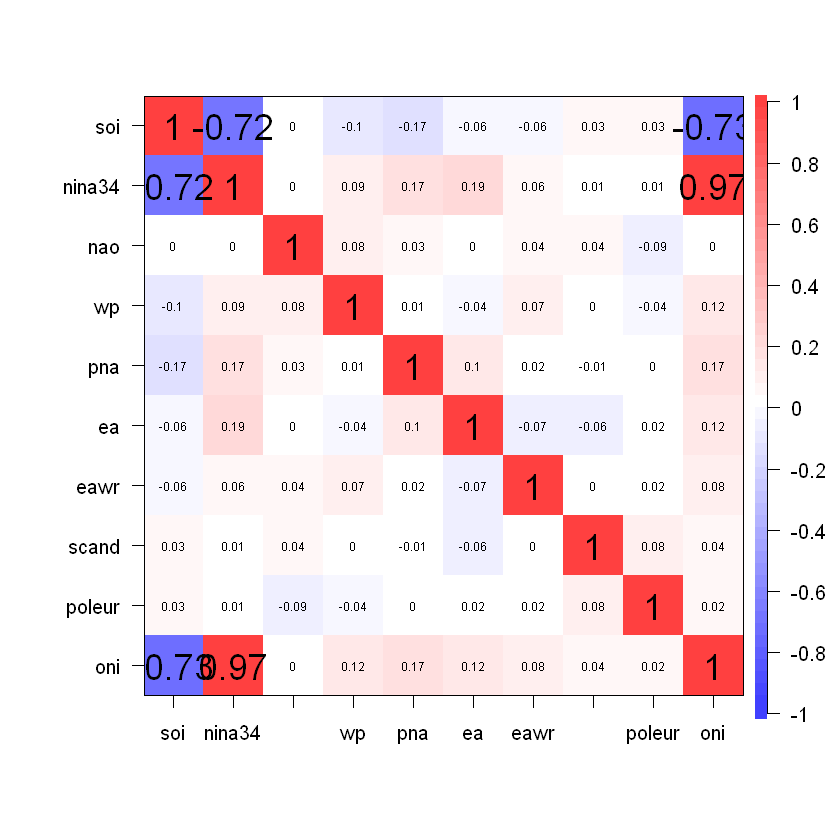

In [70]:
l = list(nina34, nao, wp, pna, ea, eawr, scand, poleur, oni)
M = as.vector(t(as.matrix(soi[1:70,-1])))
for (i in 1:9){
    M = cbind(M, as.vector(t(as.matrix(l[[i]][2:71,-1]))))
}

colnames(M) = c('soi', 'nina34', 'nao', 'wp', 'pna', 'ea', 'eawr', 'scand', 'poleur', 'oni')

#pdf(file="Figures/Figure10.pdf", height = 10, width = 10)
corPlot(M, cex = 1.2, main = '', cuts = c(.00000001, .00000002),
        gr = colorRampPalette(c("blue", "white", "red")))
#dev.off()

## Figure 11

In [33]:
ind = c()
fireSeasons = fireSeason_def_2
for (biome in 1:13){
    clusters = sort(unique(fireSeasons[which(fireSeasons$BIOME == biome),]$cl))
    n.clusters = length(clusters)

    for (cl in 1:n.clusters){
        clus = clusters[cl]  
        ind.coords = which(fireSeasons$BIOME == biome & fireSeasons$cl == clus)
        ind = c(ind, ind.coords[1])
    }
}

In [56]:
df = corr.df[ind,3:4]
colnames(df) = c('cor', 'pvalue')

for (i in seq(5,17,2)){
    df.0 = corr.df.delta[ind,i:(i+1)]
    colnames(df.0) = c('cor', 'pvalue')
    df.1 = corr.df.delta.1[ind,i:(i+1)]
    colnames(df.1) = c('cor', 'pvalue')
    df.2 = corr.df.delta.2[ind,i:(i+1)]
    colnames(df.2) = c('cor', 'pvalue')
    df.3 = corr.df.delta.3[ind,i:(i+1)]
    colnames(df.3) = c('cor', 'pvalue')
    df = rbind(df, df.0, df.1, df.2, df.3)
}
df = arrange(df, pvalue)
df[110:120,]

,cor,pvalue
67564211,-0.4726347,0.04762351
62241820,0.4690464,0.04957415
6743172,-0.4677968,0.05026742
65264516,0.4657489,0.05141946
85259012,0.4644704,0.05214867
7418282,-0.4618301,0.05367930
6785707,0.4611540,0.05407662
6986764,0.4602203,0.05462899
64088820,0.4573129,0.05637609
70155426,-0.4567779,0.05670210


In [52]:
111*1.05# +-0.46 es el umbral con el 95%

[1] 116.55

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

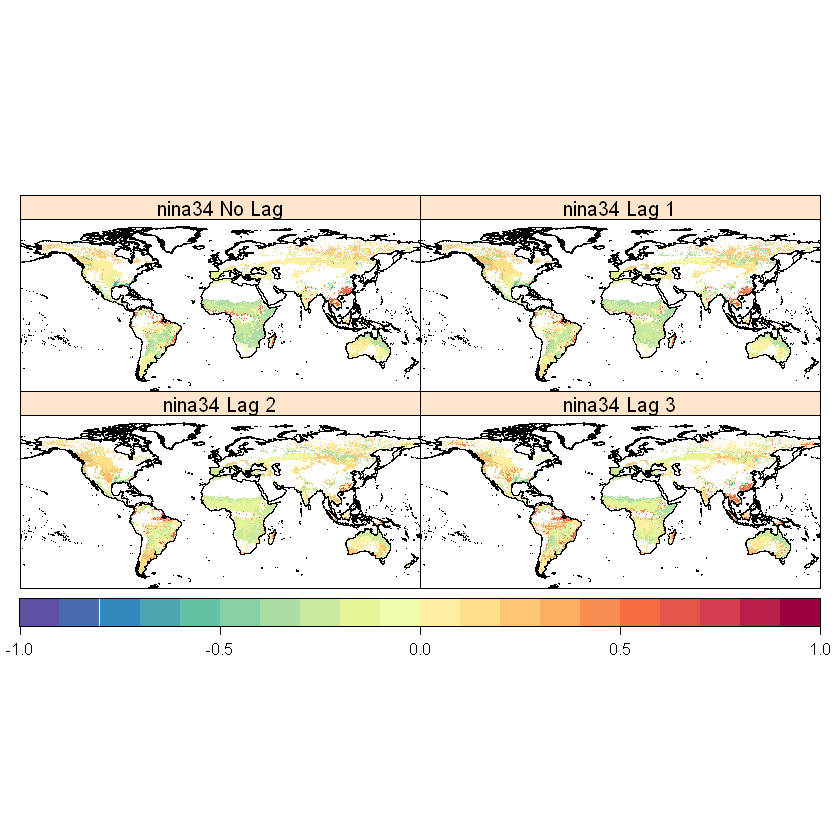

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

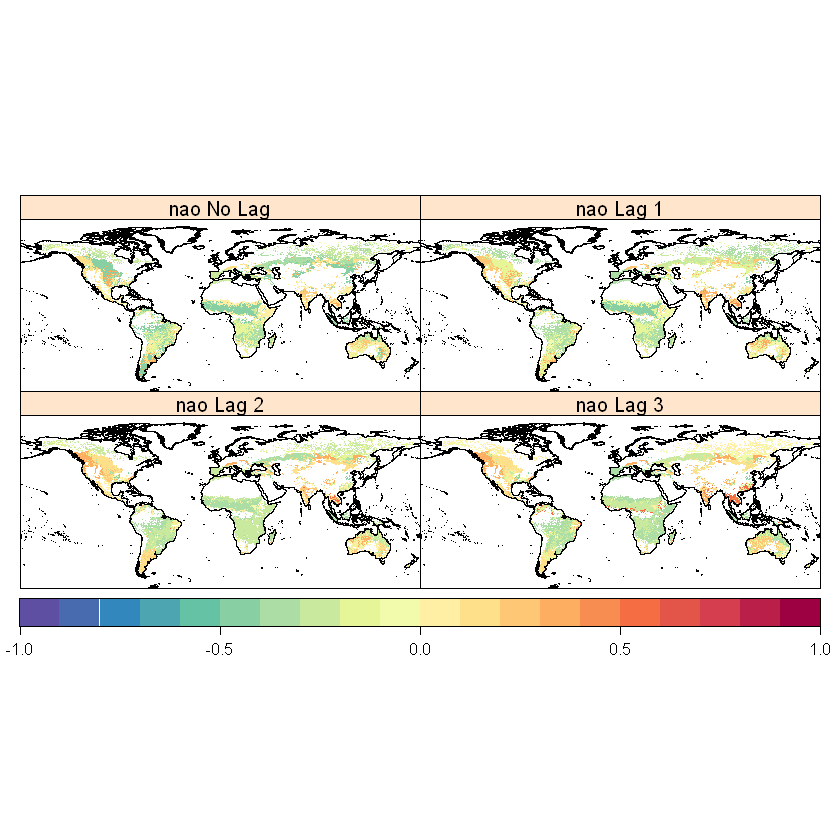

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

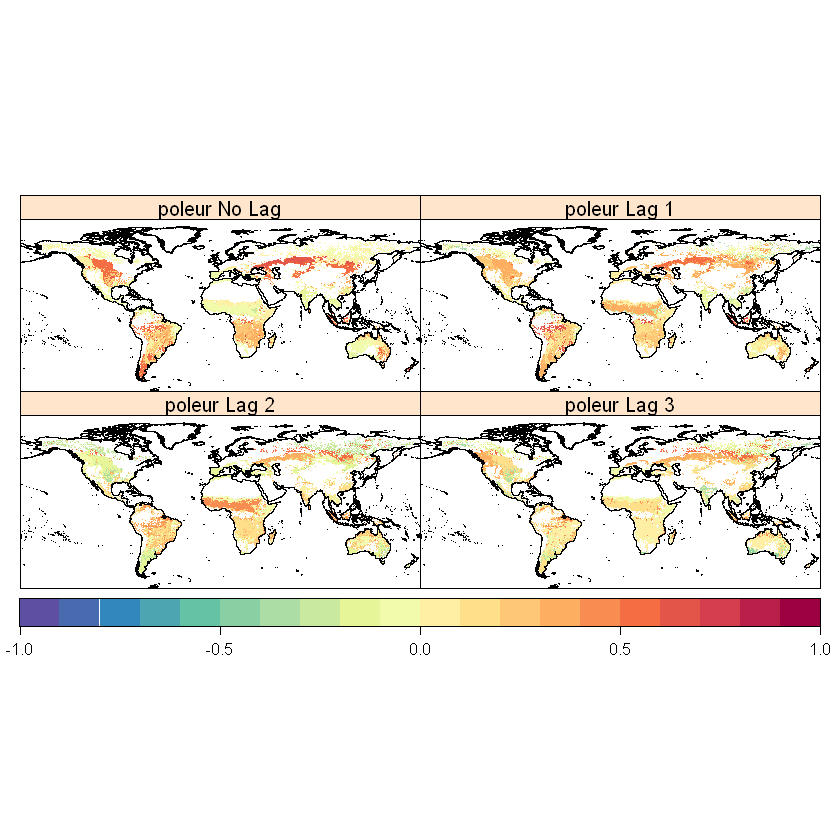

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

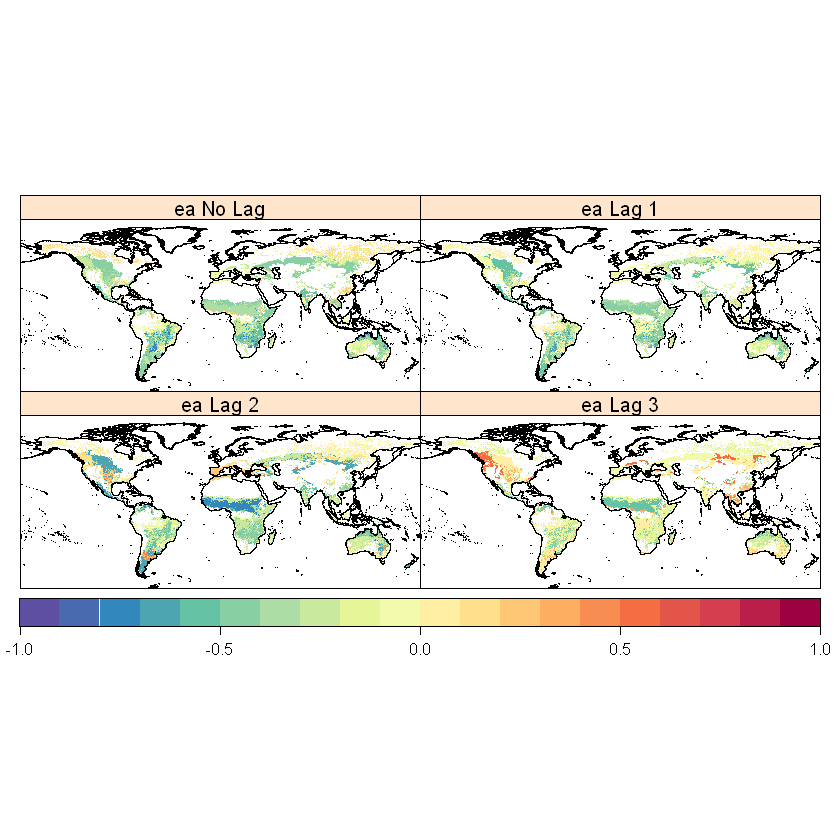

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

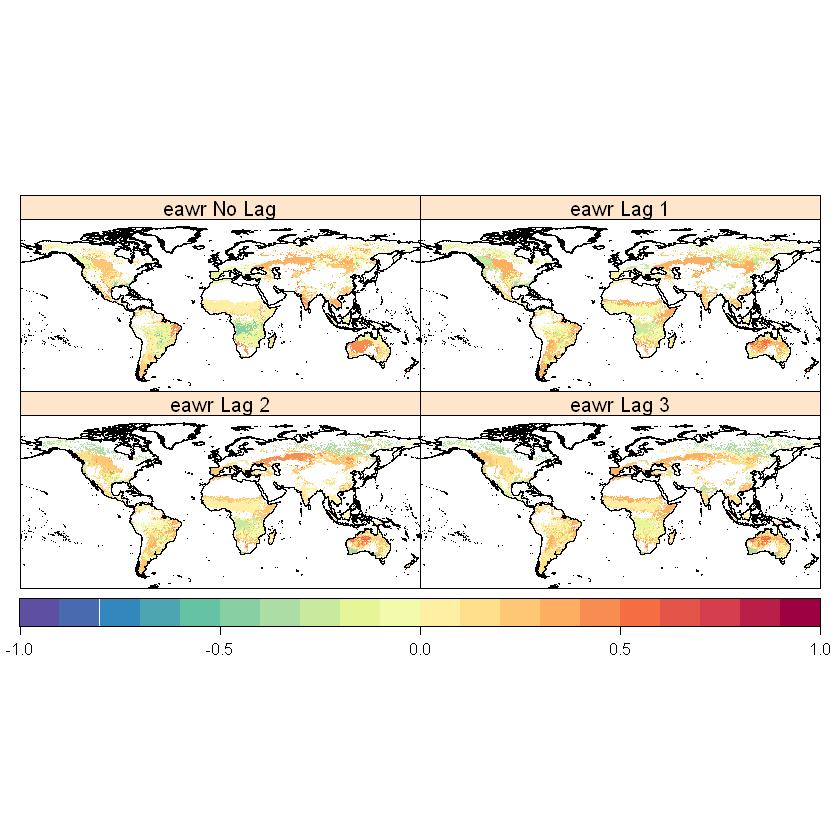

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

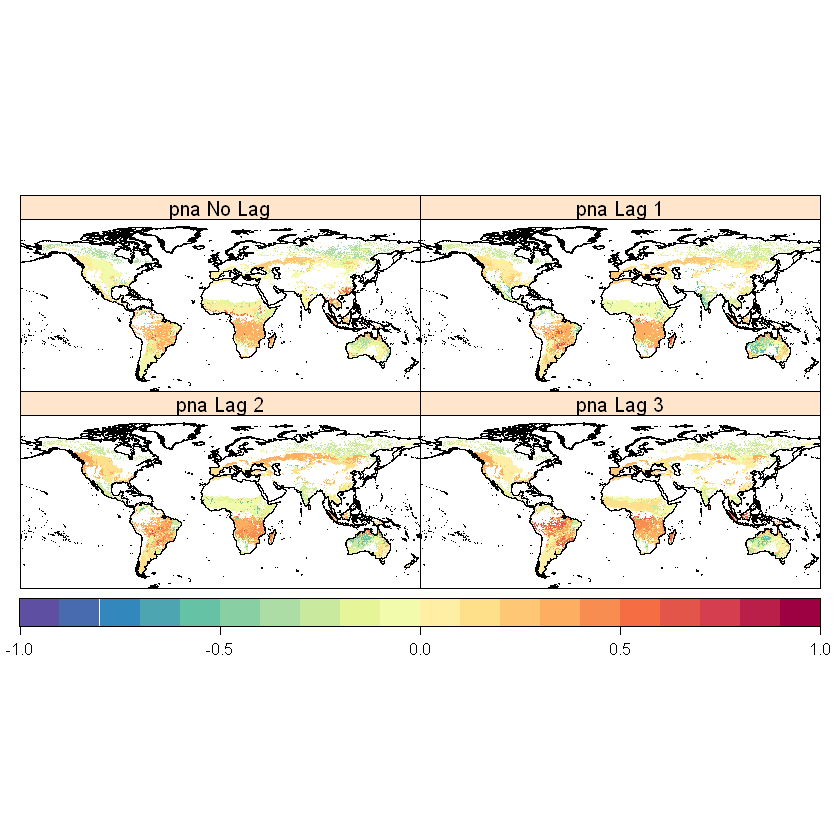

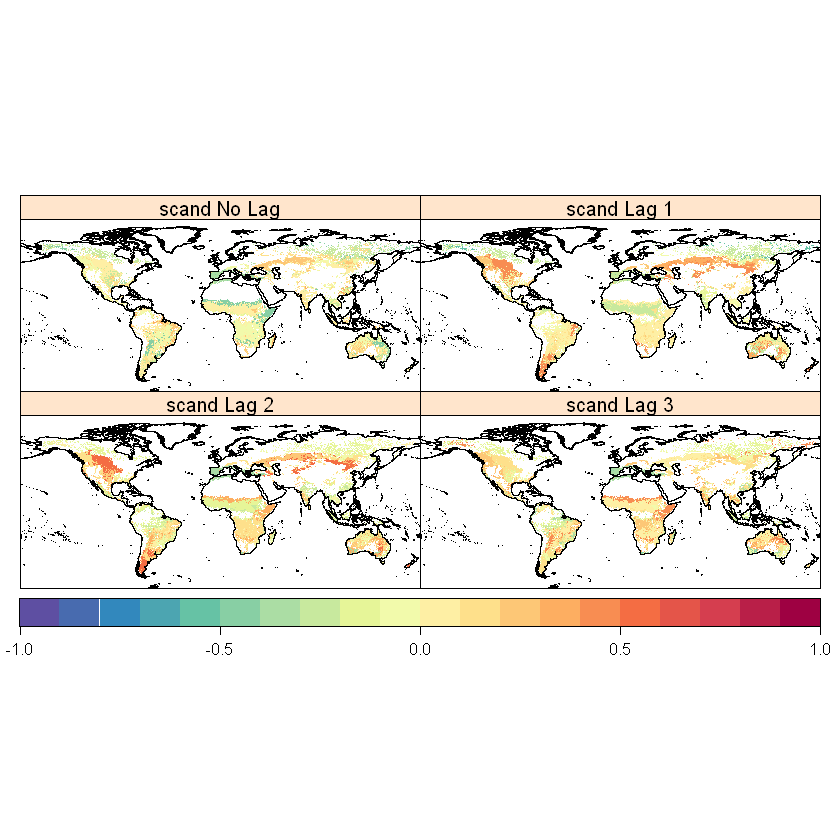

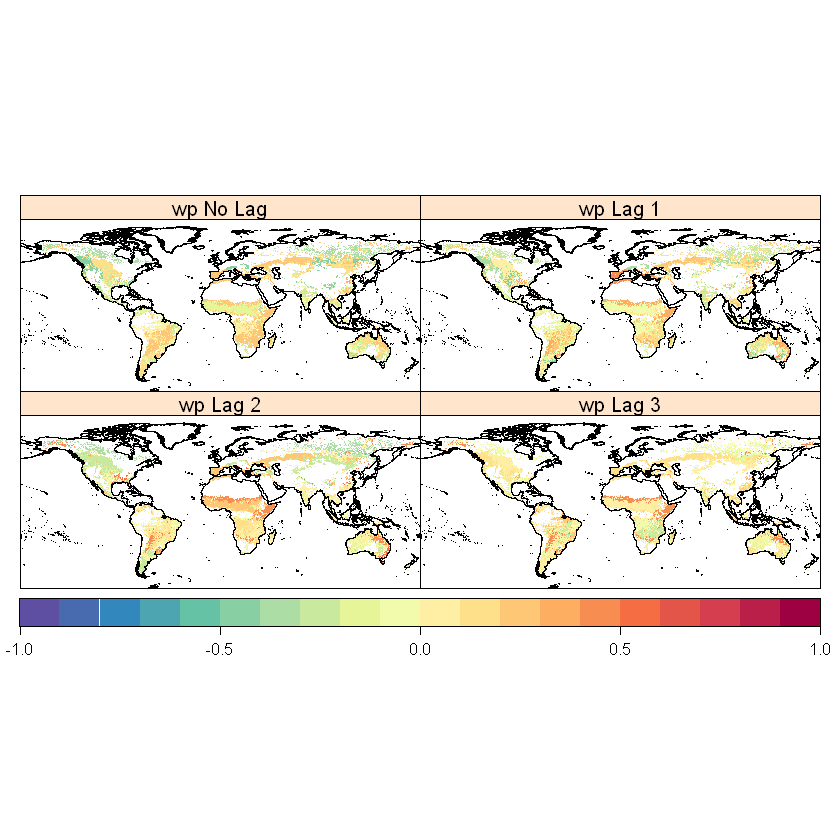

In [24]:
# correlation without deltas

names = c('nina34', 'nao', 'poleur', 'ea', 'eawr', 'pna', 'scand', 'wp', 'oni', 'soi')
for (i in 1:8){
    #pdf(paste('Figures/Figure11a_', names[i], '.pdf', sep =''), height = 14, width = 10)
    arg.list <- list(col.regions = colorRampPalette(brewer.pal(11, 'Spectral')[11:1])(21),
                          at = seq(-1, 1, 0.1), as.table = T, colorkey = list(space = 'bottom'), layout = c(2,2))
    arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
    arg.list[['names.attr']] <- c(paste(names[i], 'No Lag'), paste(names[i], 'Lag 1'), paste(names[i], 'Lag 2'),
                                 paste(names[i], 'Lag 3'))
    arg.list[["ylim"]] <- c(-65,90)
    arg.list[["xlim"]] <- c(-180,180)
    #arg.list[['main']] = paste('Annual correlation without using deltas of', names[i])
    df1 = masked_coords
    
    df1 <- cbind.data.frame(df1, corr.df[2*i+1], corr.df.lag.1[2*i+1], corr.df.lag.2[2*i+1], corr.df.lag.3[2*i+1])    
    coordinates(df1) <- c(1,2)
    gridded(df1) <- TRUE
    arg.list[["obj"]] <- df1
    do.call("spplot", arg.list) %>% print()
    #dev.off()
}

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

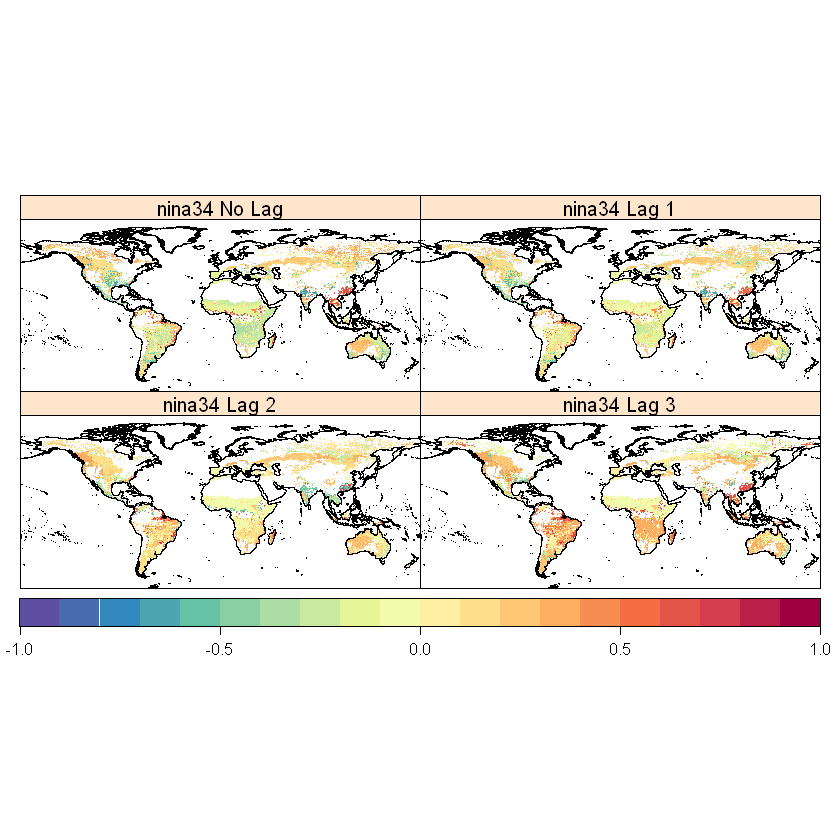

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

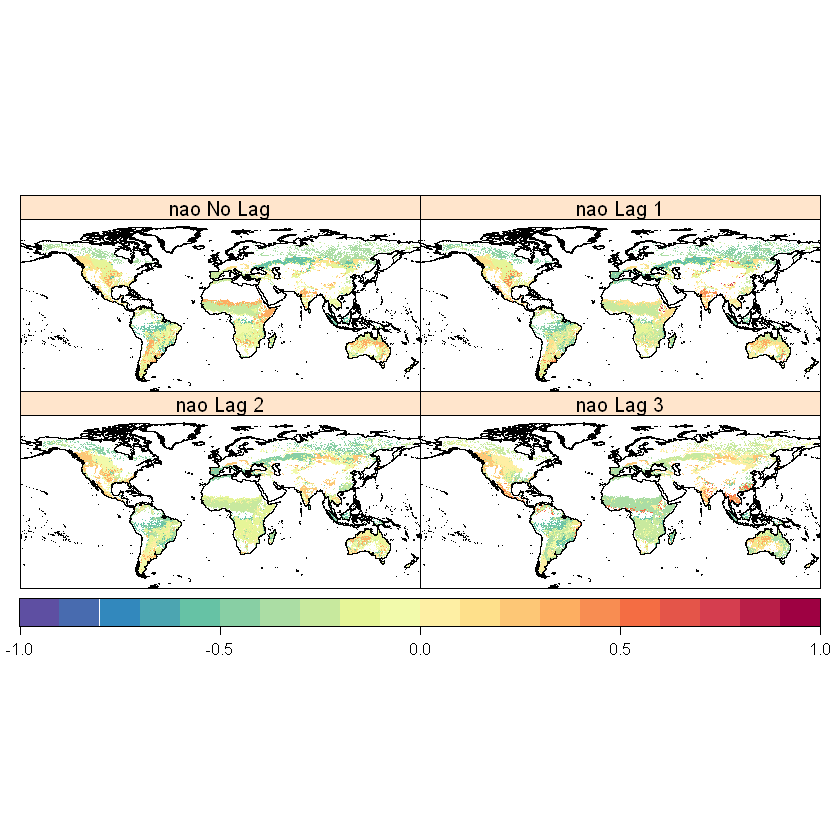

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

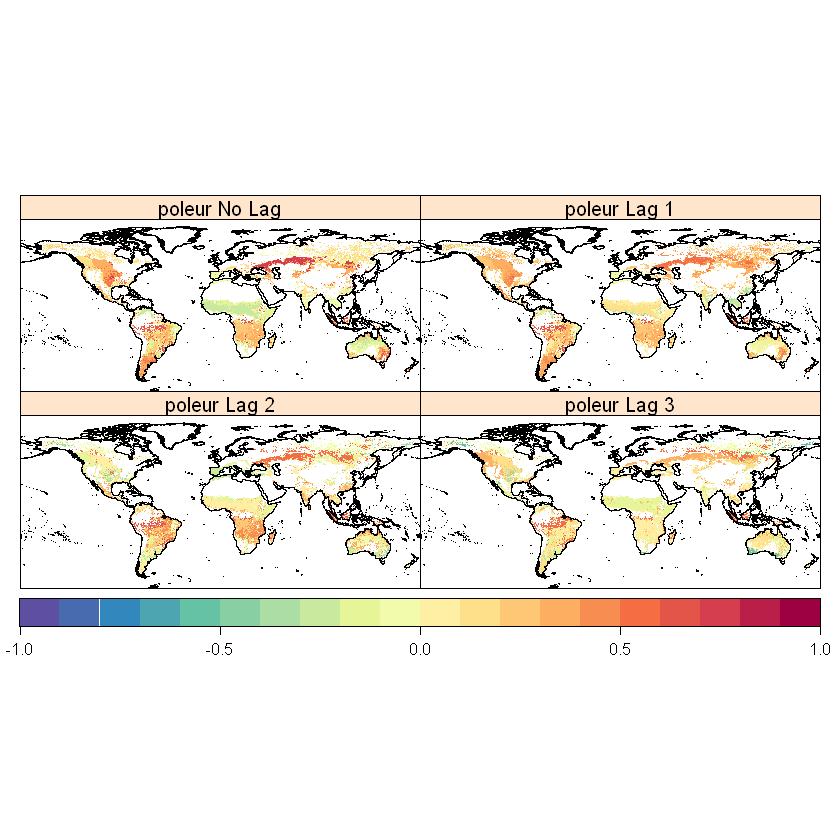

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

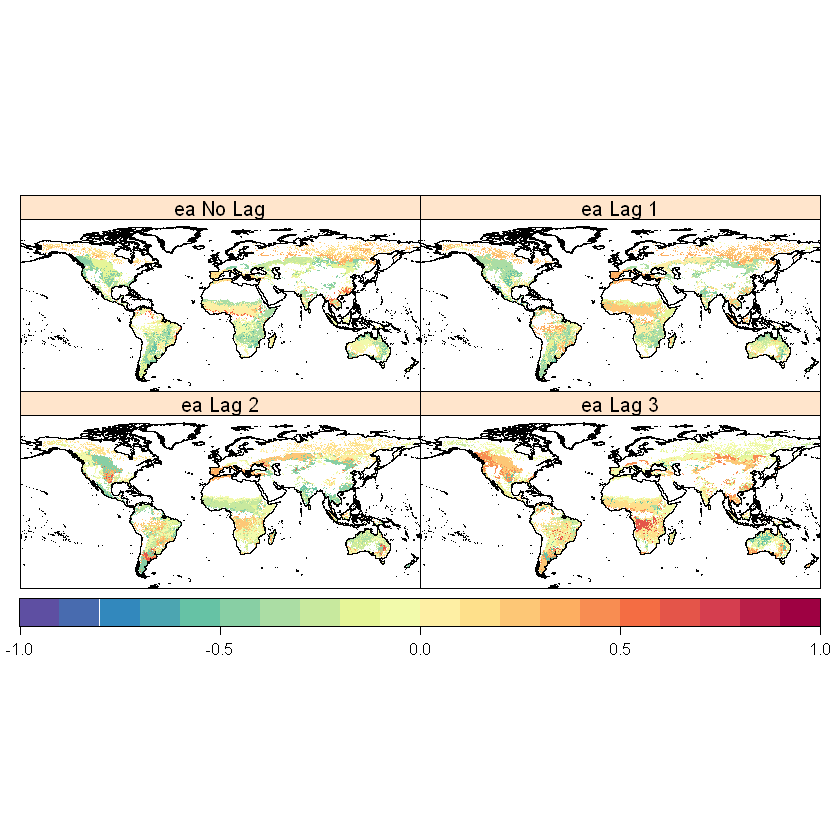

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

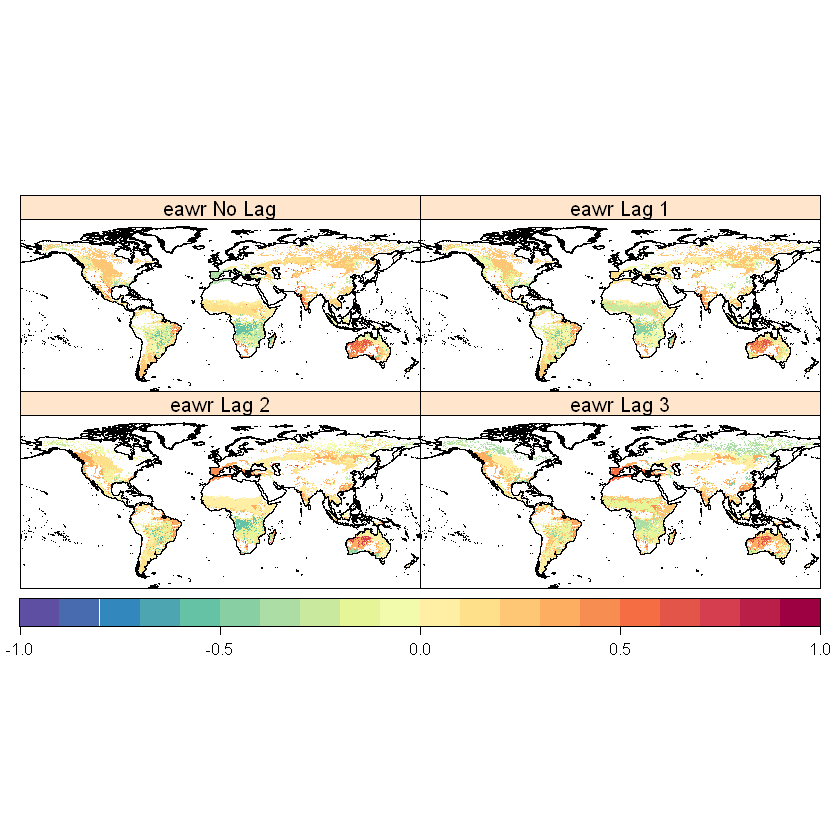

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

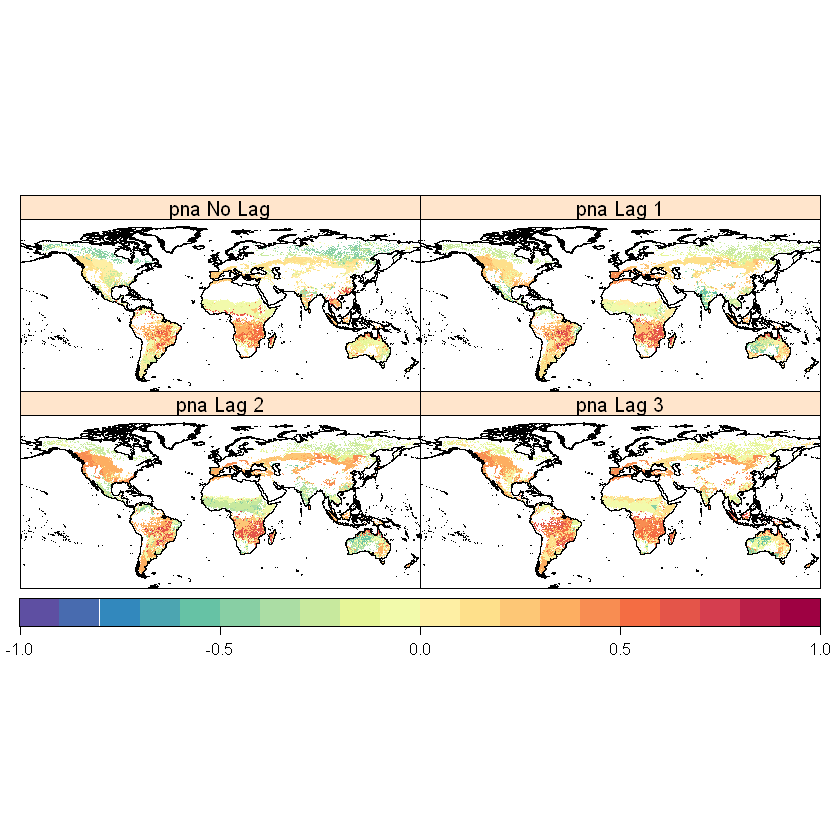

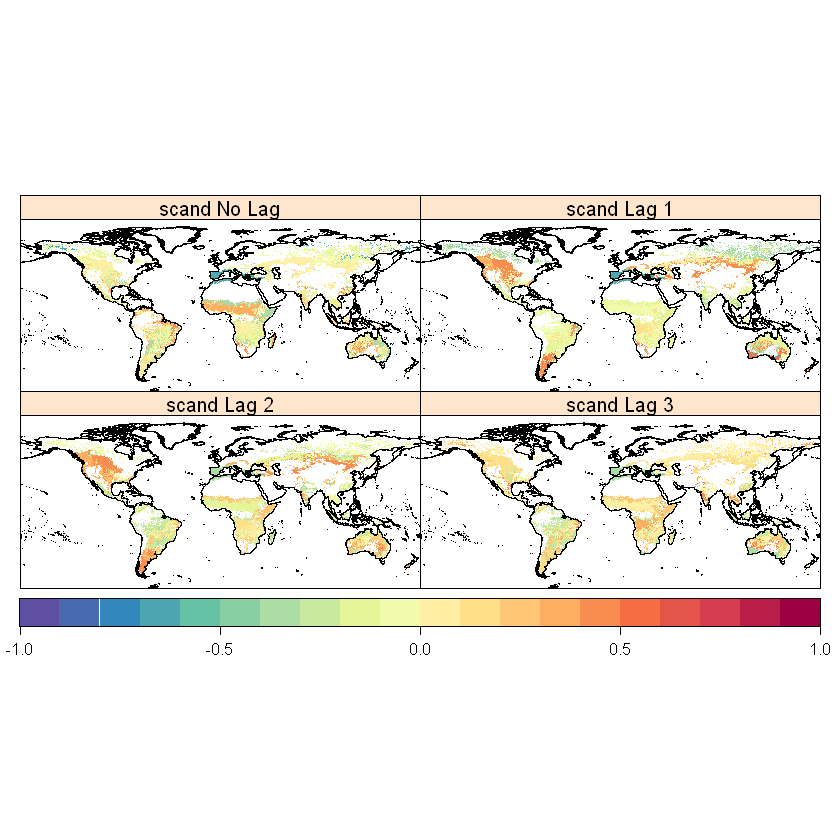

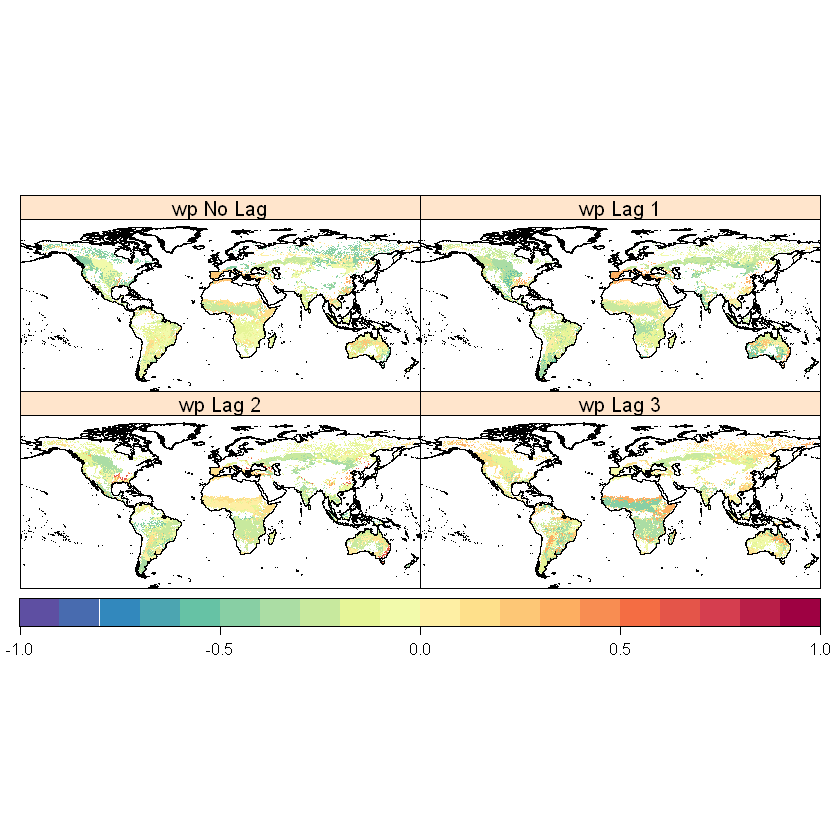

In [23]:
# correlation with deltas

names = c('nina34', 'nao', 'poleur', 'ea', 'eawr', 'pna', 'scand', 'wp', 'oni', 'soi')
for (i in 1:8){
    #pdf(paste('Figures/Figure11b_', names[i], '.pdf', sep =''), height = 14, width = 10)
    arg.list <- list(col.regions = colorRampPalette(brewer.pal(11, 'Spectral')[11:1])(21),
                          at = seq(-1, 1, 0.1), as.table = T, colorkey = list(space = 'bottom'), layout = c(2,2))
    arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
    arg.list[['names.attr']] <- c(paste(names[i], 'No Lag'), paste(names[i], 'Lag 1'), paste(names[i], 'Lag 2'),
                                 paste(names[i], 'Lag 3'))
    arg.list[["ylim"]] <- c(-65,90)
    arg.list[["xlim"]] <- c(-180,180)
    #arg.list[['main']] = paste('Annual correlation using deltas of', names[i])
    df1 = masked_coords
    
    df1 <- cbind.data.frame(df1, corr.df.delta[2*i+1], corr.df.delta.1[2*i+1], corr.df.delta.2[2*i+1],
                            corr.df.delta.3[2*i+1])    
    coordinates(df1) <- c(1,2)
    gridded(df1) <- TRUE
    arg.list[["obj"]] <- df1
    do.call("spplot", arg.list) %>% print()
    #dev.off()
}

## Figure 12

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

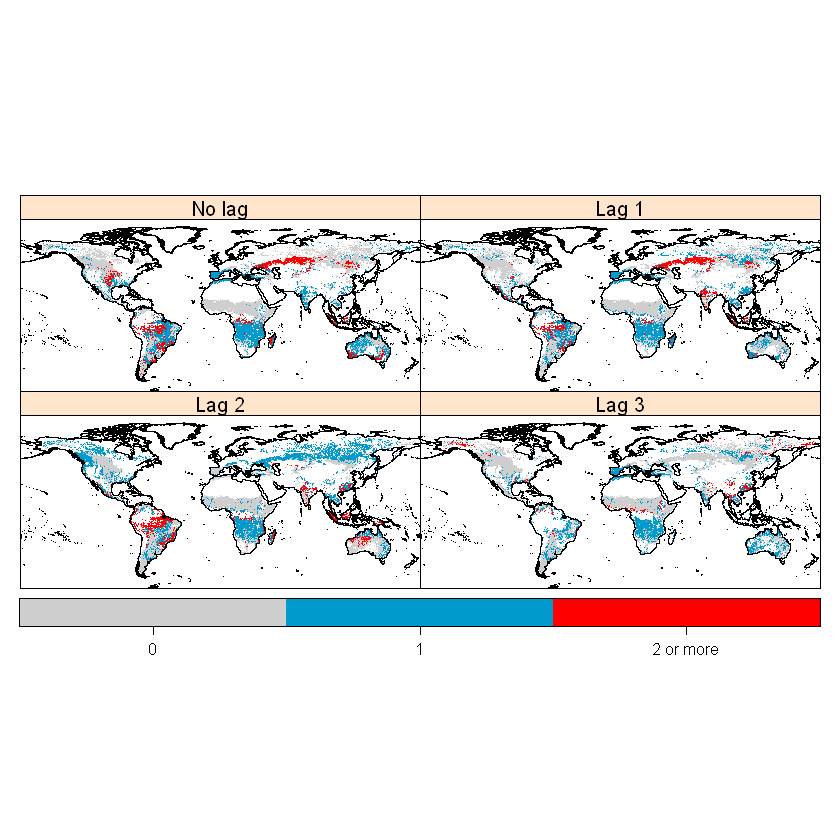

In [60]:
# Number of correlated indices

v = cbind(as.numeric(corr.df.delta$nao.pvalue<0.05), as.numeric(corr.df.delta$poleur.pvalue<0.05),
          as.numeric(corr.df.delta$ea.pvalue<0.05), as.numeric(corr.df.delta$eawr.pvalue<0.05),
          as.numeric(corr.df.delta$pna.pvalue<0.05), as.numeric(corr.df.delta$nina34.pvalue<0.05), 
          as.numeric(corr.df.delta$scand.pvalue<0.05), as.numeric(corr.df.delta$wp.pvalue<0.05))
lag0 = rowSums(v)
df1 <- cbind.data.frame(masked_coords, lag0)

v = cbind(as.numeric(corr.df.delta.1$nao.pvalue<0.05), as.numeric(corr.df.delta.1$poleur.pvalue<0.05),
          as.numeric(corr.df.delta.1$ea.pvalue<0.05), as.numeric(corr.df.delta.1$eawr.pvalue<0.05),
          as.numeric(corr.df.delta.1$pna.pvalue<0.05), as.numeric(corr.df.delta.1$nina34.pvalue<0.05), 
          as.numeric(corr.df.delta.1$scand.pvalue<0.05), as.numeric(corr.df.delta.1$wp.pvalue<0.05))
lag1 = rowSums(v)
df1 <- cbind.data.frame(df1, lag1)

v = cbind(as.numeric(corr.df.delta.2$nao.pvalue<0.05), as.numeric(corr.df.delta.2$poleur.pvalue<0.05),
          as.numeric(corr.df.delta.2$ea.pvalue<0.05), as.numeric(corr.df.delta.2$eawr.pvalue<0.05),
          as.numeric(corr.df.delta.2$pna.pvalue<0.05), as.numeric(corr.df.delta.2$nina34.pvalue<0.05), 
          as.numeric(corr.df.delta.2$scand.pvalue<0.05), as.numeric(corr.df.delta.2$wp.pvalue<0.05))
lag2 = rowSums(v)
df1 <- cbind.data.frame(df1, lag2)

v = cbind(as.numeric(corr.df.delta.3$nao.pvalue<0.05), as.numeric(corr.df.delta.3$poleur.pvalue<0.05),
          as.numeric(corr.df.delta.3$ea.pvalue<0.05), as.numeric(corr.df.delta.3$eawr.pvalue<0.05),
          as.numeric(corr.df.delta.3$pna.pvalue<0.05), as.numeric(corr.df.delta.3$nina34.pvalue<0.05), 
          as.numeric(corr.df.delta.3$scand.pvalue<0.05), as.numeric(corr.df.delta.3$wp.pvalue<0.05))
lag3 = rowSums(v)
df1 <- cbind.data.frame(df1, lag3)

#pdf('Figures/Figure12_part1.pdf', height = 12, width = 10)
arg.list <- list(col.regions = c('grey81', 'deepskyblue3', 'red'), as.table = T,
                          at = seq(-.5, 2.5, 1), colorkey = list(labels = list(labels = c("0", "1", "2 or more"),
                                               at = c(0,1,2)), space = 'bottom'))
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["ylim"]] <- c(-65,90)
arg.list[["xlim"]] <- c(-180,180)
arg.list[['names.attr']] <- c('No lag', 'Lag 1', 'Lag 2', 'Lag 3')
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["obj"]] <- df1
#arg.list[['main']] <- 'Number of predictors used in regression models'
do.call("spplot", arg.list) %>% print()
#dev.off()

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

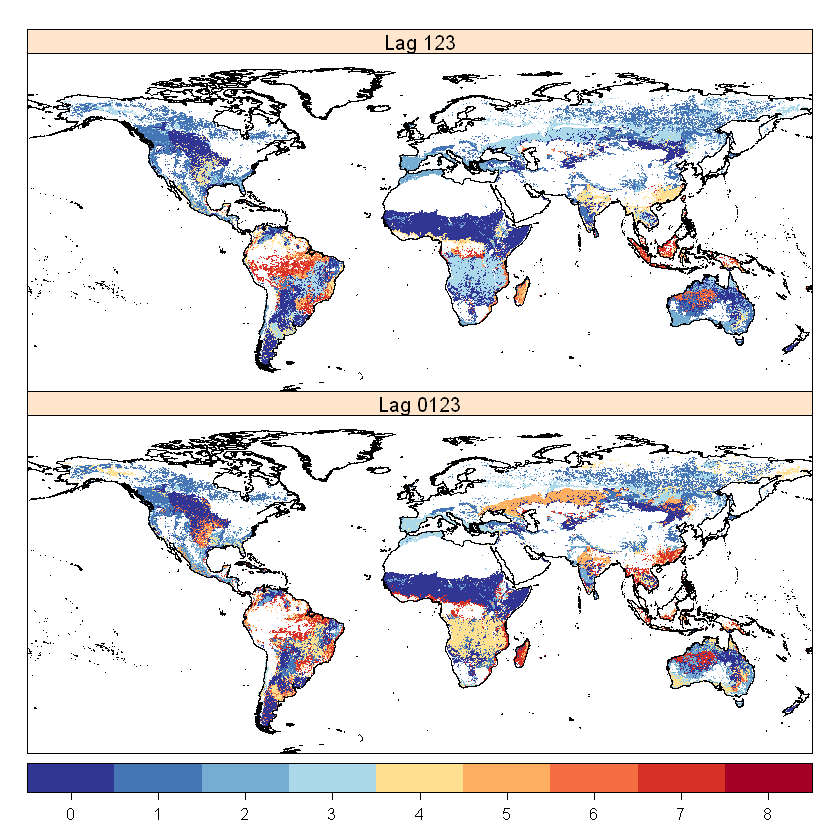

In [59]:
lag123 = lag1 + lag2 + lag3
df1 <- cbind.data.frame(masked_coords, lag123)

lag0123 = lag0 + lag1 + lag2 + lag3
df1 <- cbind.data.frame(df1, lag0123)

#pdf('Figures/Figure12_part2.pdf', height = 12, width = 10)
arg.list <- list(col.regions = rev(brewer.pal(10, "RdYlBu")), as.table = T,
                          at = seq(-.5, 8.5, 1), colorkey = list(labels = list(labels = c("0", "1", "2", '3', '4', '5', '6',
                                                                                         '7', '8'),
                                               at = seq(0,8,1)), space = 'bottom'))
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["ylim"]] <- c(-65,90)
arg.list[["xlim"]] <- c(-180,180)
arg.list[['names.attr']] <- c('Lag 123', 'Lag 0123')
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["obj"]] <- df1
do.call("spplot", arg.list) %>% print()

#dev.off()

# Figure 13

In [47]:
# Models results

#' @title Data frame of the selected metric results obtention
#' @description Obtains a data frame that contains the validation information about one specific metric obtained in the models.
#  This data is stored in the following dataframes: table, table.deltas.Lag.1, table.deltas.Lag.2, table.deltas.Lag.3 and
#  table.deltas.Lag.0123
#' @param inds Number of the columns of the data frames (all of them have the same structure) that contains the information 
#  about that metric
#' @param name String containing the name of the metric
#' @return Data frame whose columns are the results of each different model
get.table.violin.plot <- function(inds, name){
    names = c()
    names[inds[1]] = 'lm'
    names[inds[2]] = 'rf'
    names[inds[3]] = 'knn'
    Table = data.frame()
    for (i in c(inds[1], inds[2], inds[3])){
        table1 = table[,c(1,2,i)]
        colnames(table1) = c('biome', 'cluster', name)
        table1$Method = paste(names[i], '_0', sep = '')
        table1$Technique = names[i]

        table2 = table.deltas.Lag.1[,c(1,2,i)]
        colnames(table2) = c('biome', 'cluster', name)
        table2$Method = paste(names[i], '_1', sep = '')
        table2$Technique = names[i]

        table3 = table.deltas.Lag.2[,c(1,2,i)]
        colnames(table3) = c('biome', 'cluster', name)
        table3$Method = paste(names[i], '_2', sep = '')
        table3$Technique = names[i]

        table4 = table.deltas.Lag.3[,c(1,2,i)]
        colnames(table4) = c('biome', 'cluster', name)
        table4$Method = paste(names[i], '_3', sep = '')
        table4$Technique = names[i]
        
        table5 = table.deltas.Lag.123[,c(1,2,i)]
        colnames(table5) = c('biome', 'cluster', name)
        table5$Method = paste(names[i], '_123', sep = '')
        table5$Technique = names[i]

        table6 = table.deltas.Lag.0123[,c(1,2,i)]
        colnames(table6) = c('biome', 'cluster', name)
        table6$Method = paste(names[i], '_0123', sep = '')
        table6$Technique = names[i]

        Table = rbind(Table, table1, table2, table3, table4, table5, table6)
    }
    Table$Method = as.factor(Table$Method)
    return (Table)
}

Warning message:
"Removed 307 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 307 rows containing non-finite values (stat_summary)."Warning message:
"Removed 307 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 307 rows containing non-finite values (stat_summary)."Warning message:
"Removed 307 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 307 rows containing non-finite values (stat_summary)."

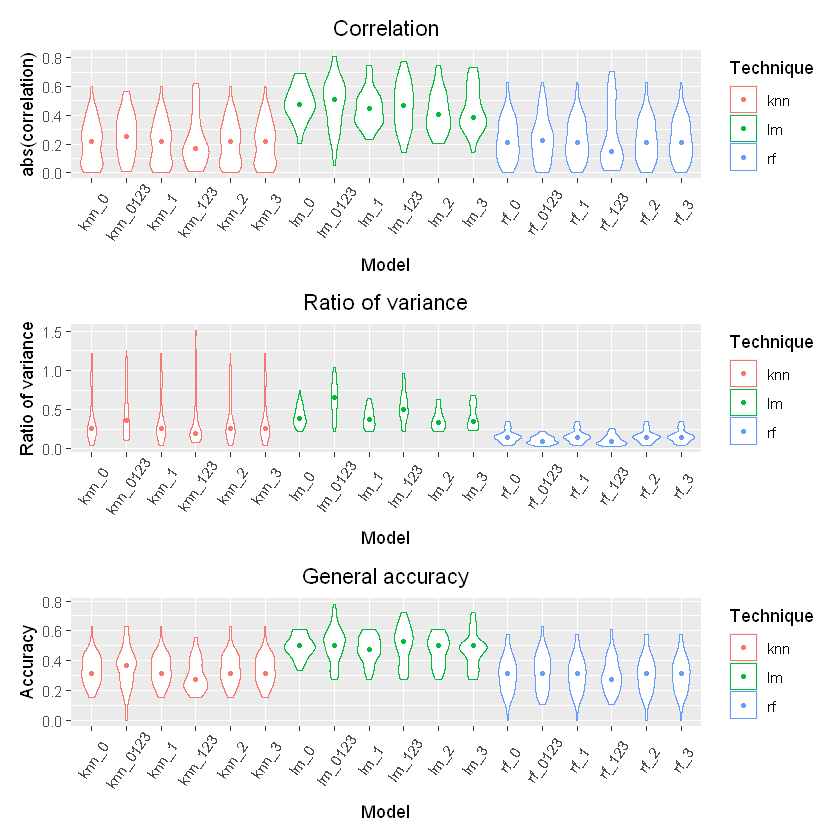

In [53]:
Table.cor <- get.table.violin.plot(c(8,20,30), 'cor')
Table.RVar <- get.table.violin.plot(c(6,18,28), 'RVar')
Table.acc <- get.table.violin.plot(c(9,21,31), 'acc')

l = list()# colores de los violines por metodo
l[[1]] <- ggplot(Table.cor, aes(x=Method, y=abs(cor), color = Technique)) + geom_violin() + stat_summary(fun=median, geom="point", size = 1) + ggtitle('Correlation') + theme(plot.title = element_text(hjust = 0.5)) + ylab('abs(correlation)') + theme(axis.text.x = element_text(angle = 55, vjust = .6)) + xlab('Model')
l[[2]] <- ggplot(Table.RVar, aes(x=Method, y=RVar, color = Technique)) + geom_violin() + stat_summary(fun=median, geom="point", size = 1) + ggtitle('Ratio of variance') + theme(plot.title = element_text(hjust = 0.5)) + ylab('Ratio of variance') + theme(axis.text.x = element_text(angle = 55, vjust = .6)) + xlab('Model')
l[[3]] <- ggplot(Table.acc, aes(x=Method, y=acc, color = Technique)) + geom_violin() + stat_summary(fun=median, geom="point", size = 1) + ggtitle('General accuracy') + theme(plot.title = element_text(hjust = 0.5)) + ylab('Accuracy') + theme(axis.text.x = element_text(angle = 55, vjust = .6)) + xlab('Model')
#pdf('Figures/Figure13_part1.pdf')
l[[1]] / l[[2]] / l[[3]]
#dev.off()

Warning message:
"Removed 307 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 307 rows containing non-finite values (stat_summary)."Warning message:
"Removed 307 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 307 rows containing non-finite values (stat_summary)."Warning message:
"Removed 307 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 307 rows containing non-finite values (stat_summary)."

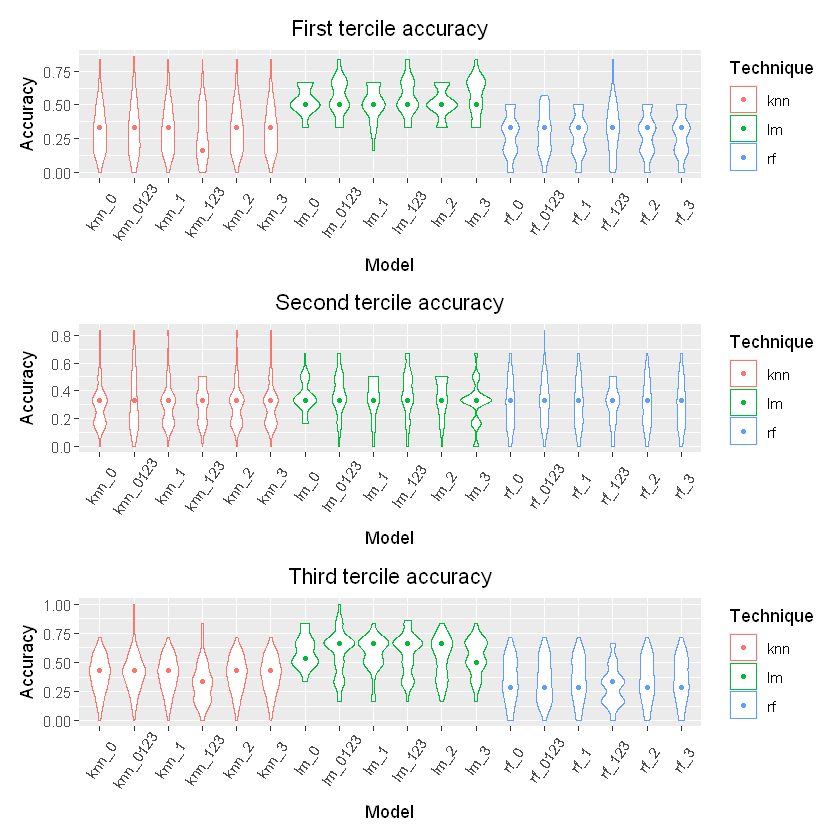

In [52]:
Table.acc1 <- get.table.violin.plot(c(10,22,32), 'acc1')
Table.acc2 <- get.table.violin.plot(c(11,23,33), 'acc2')
Table.acc3 <- get.table.violin.plot(c(12,24,34), 'acc3')

l = list()
l[[1]] <- ggplot(Table.acc1, aes(x=Method, y=acc1, color = Technique)) + geom_violin() + stat_summary(fun=median, geom="point", size = 1) + ggtitle('First tercile accuracy') + theme(plot.title = element_text(hjust = 0.5)) + ylab('Accuracy') + theme(axis.text.x = element_text(angle = 55, vjust = .6)) + xlab('Model')
l[[2]] <- ggplot(Table.acc2, aes(x=Method, y=acc2, color = Technique)) + geom_violin() + stat_summary(fun=median, geom="point", size = 1) + ggtitle('Second tercile accuracy') + theme(plot.title = element_text(hjust = 0.5)) + ylab('Accuracy') + theme(axis.text.x = element_text(angle = 55, vjust = .6)) + xlab('Model')
l[[3]] <- ggplot(Table.acc3, aes(x=Method, y=acc3, color = Technique)) + geom_violin() + stat_summary(fun=median, geom="point", size = 1) + ggtitle('Third tercile accuracy') + theme(plot.title = element_text(hjust = 0.5)) + ylab('Accuracy') + theme(axis.text.x = element_text(angle = 55, vjust = .6)) + xlab('Model')
#pdf('Figures/Figure13_part2.pdf')
l[[1]] / l[[2]] / l[[3]]
#dev.off()

## Figure 14

In [8]:
source("scripts/modelling_functions_new.R")

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:psych':

    outlier

The following object is masked from 'package:ggplot2':

    margin

The following object is masked from 'package:dplyr':

    combine

Warning message:
"package 'tree' was built under R version 3.6.3"

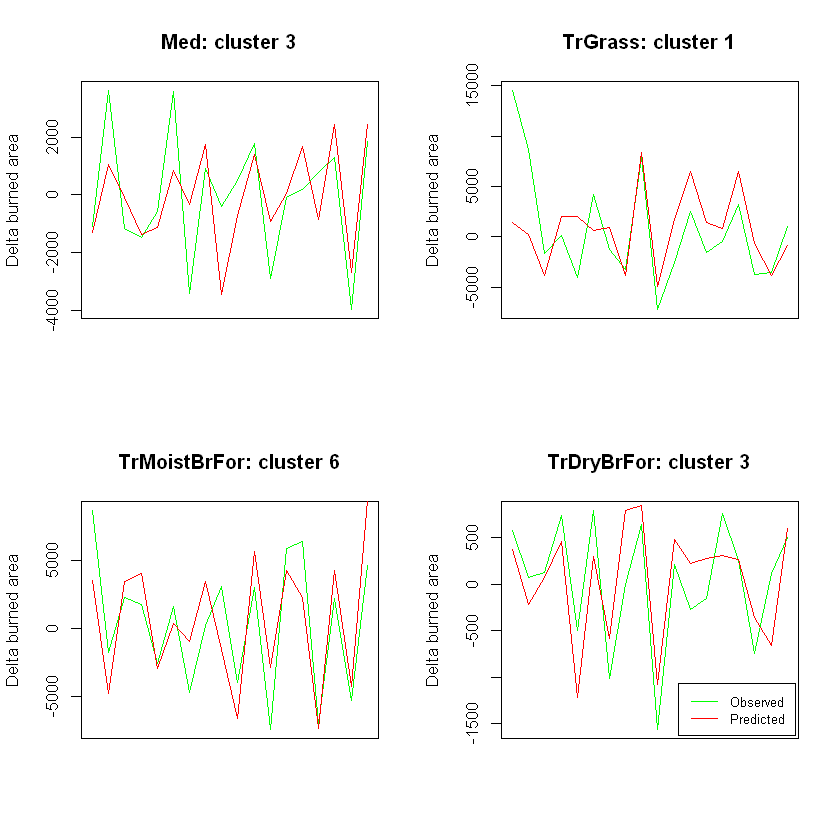

In [34]:
# Predicted time series versus observed time series

#pdf('Figures/Figure14.pdf')

# Doing the plots
par(mfrow=c(2,2))
biomes.to.plot = c(12, 7, 1, 2)
clusters.to.plot = c(3, 1, 6, 3)

for (i in 1:4){
    lm <- lm.obtention(fireSeason_def_2, log1p(masked_ba_series), dates, 
                  cbind(corr.df.delta.1, corr.df.delta.2[,-c(1,2)], corr.df.delta.3[,-c(1,2)]), 
                  list(nina34, nao, poleur, ea, eawr, pna, scand, wp), biome = biomes.to.plot[i], cluster = clusters.to.plot[i],
                       t = 3, useDeltas = T, min.t = 1)

    # Observed vs predicted plot
    plot(lm$mod$pred$obs, col = 'green', ylab = "Delta burned area", type = 'l', xaxt = 'n', xlab = '',
         main = paste(legend.biomes$Label[biomes.to.plot[i]], ': cluster ', clusters.to.plot[i], sep = ''))
    lines(lm$mod$pred$pred, col = 'red')
}

legend(11.3, -1070, legend=c("Observed", "Predicted"),
       col=c("green", "red"), lty=1, cex=0.8)

#dev.off()

In [ ]:
# lm123
# ver como salen las predicciones para turquia, california, grecia